# 🌤️ Weather Dashboard Application ⛅

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1IuDdavi_5tswsJZTiciinU_qSbpmsGrU?usp=sharing)

> **⚠️ Important:** This notebook contains interactive widgets. For full functionality, click the badge above to open in Google Colab!

---

## 🚀 Quick Start

1. Click **Runtime** → **Run all** (or press `Ctrl+F9`)
2. Wait for all cells to execute
3. Scroll down to the last cell to see the interactive menu
4. Follow the on-screen instructions!

---

## 📋 Features

✅ **Real-time Weather Data** - Powered by OpenWeatherMap API  
✅ **Natural Language Queries** - Ask "Will it rain tomorrow in Paris?"  
✅ **Smart Auto-Correct** - Automatically fixes city name typos  
✅ **Beautiful Visualizations** - 4 interactive charts per city  
✅ **Multi-City Comparison** - Compare weather across multiple cities  
✅ **5-Day Forecasts** - Detailed predictions with high/low temps  

---

## 💡 How to Use

After running all cells, you'll see an interactive menu. Choose from:

1. **🖥️ Terminal Menu** - Full-featured text menu
2. **💬 Natural Language** - Ask weather questions naturally
3. **🚀 Quick Check** - Fast single-city lookup
4. **❌ Exit** - Close the application

---

## 📝 Note

GitHub shows a static preview. For the interactive version, use the "Open in Colab" badge above!

---

In [ ]:
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'


## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
import pandas as pd
from datetime import datetime
from hands_on_ai.chat import get_response


##🌤️ Weather Data Functions

In [ ]:
def get_weather_data_openweather(location, forecast_days=5, api_key="8c9d00096e85ca3599502e89d125af21"):
    """Gets current weather and forecast data for a specific location"""

    # Get current weather
    current_url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric"

    # Get 5-day forecast
    forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}&units=metric"

    try:
        # Request both current weather and forecast
        current_response = requests.get(current_url)
        forecast_response = requests.get(forecast_url)

        # Check if both requests were successful
        if current_response.status_code == 200 and forecast_response.status_code == 200:
            return {
                'current': current_response.json(),
                'forecast': forecast_response.json()
            }
        else:
            return None

    except Exception as e:
        print(f"❌ Error fetching data for {location}: {e}")
        return None

def display_weather_for_city(weather_data):
    """Displays detailed weather information for one city"""

    current = weather_data['current']
    forecast = weather_data['forecast']

    # Extract current weather details
    city_name = current['name']
    country = current['sys']['country']
    temp = current['main']['temp']
    feels_like = current['main']['feels_like']
    humidity = current['main']['humidity']
    wind_speed = current['wind']['speed']
    description = current['weather'][0]['description']
    pressure = current['main']['pressure']
    visibility = current.get('visibility', 0) / 1000  # Convert to km

    # Display city header
    print("\n" + "="*50)
    print(f"📍 {city_name}, {country}")
    print("="*50)

    # Display current conditions
    print(f"☁️  Conditions: {description.title()}")
    print(f"🌡️  Current Temperature: {temp}°C (Feels like {feels_like}°C)")
    print(f"💧 Humidity: {humidity}%")
    print(f"💨 Wind Speed: {wind_speed} m/s")
    print(f"🎈 Pressure: {pressure} hPa")
    print(f"👁️  Visibility: {visibility:.1f} km")

    # Display 5-day forecast
    print(f"\n📅 5-Day Forecast:")
    print("-" * 50)

    # Group forecasts by date
    current_date = None

    for item in forecast['list']:
        # Get the date and time from forecast
        date_time = datetime.fromtimestamp(item['dt'])
        date = date_time.strftime('%Y-%m-%d')

        # Only show one forecast per day (use noon forecast)
        if date != current_date and date_time.hour == 12:
            current_date = date
            temp_max = item['main']['temp_max']
            temp_min = item['main']['temp_min']
            description = item['weather'][0]['description']
            day_name = date_time.strftime('%A')

            print(f"{day_name}, {date_time.strftime('%b %d')}:")
            print(f"  🌡️  High: {temp_max}°C | Low: {temp_min}°C")
            print(f"  ☁️  {description.title()}")
            print()

def create_weather_dashboard(city_list):
    """Creates and displays a weather dashboard for given cities"""

    # Initialize empty list for storing weather data
    city_weather_data = []

    # Loop through each city
    for city in city_list:
        # Get weather data using our function
        weather_data = get_weather_data_openweather(city)

        # Check if we got data successfully
        if weather_data:
            city_weather_data.append(weather_data)
        else:
            print(f"❌ Error: Could not get weather for {city}")

    # Display the dashboard header
    print("\n" + "="*50)
    print("🌤️  WEATHER DASHBOARD")
    print("="*50)

    # Display current date and time
    current_time = datetime.now().strftime("%B %d, %Y - %I:%M %p")
    print(f"📅 {current_time}")

    # Display weather for each city
    for data in city_weather_data:
        display_weather_for_city(data)

    print("\n" + "="*50)
    print("✅ Dashboard Complete!")
    print("="*50)

    # Return the data so it can be used in Cell 2
    return city_weather_data

def validate_city_input(user_input):
    """Checks if the user's input is in the correct format"""

    # Check if input is empty
    if not user_input or user_input.strip() == "":
        return False, "❌ Error: You didn't enter anything! Please enter at least one city."

    # Check if input contains only numbers or special characters
    if user_input.replace(",", "").replace(" ", "").isdigit():
        return False, "❌ Error: City names cannot be only numbers!"

    # Check for excessive special characters
    special_chars = "!@#$%^&*()_+={}[]|\\:;\"'<>?/"
    if any(char in user_input for char in special_chars):
        return False, "❌ Error: City names cannot contain special characters like !@#$%"

    # Split by comma and check each city
    cities = [city.strip() for city in user_input.split(",")]

    # Check if any city is empty after splitting
    for city in cities:
        if city == "":
            return False, "❌ Error: You have empty city names. Check your commas!"

        # Check if city name is too short (less than 2 characters)
        if len(city) < 2:
            return False, f"❌ Error: '{city}' is too short to be a city name!"

    # If all checks pass, return True
    return True, cities

def main():
    """Main function to run the program"""

    print("Welcome to the Weather Dashboard!")
    print("\nEnter cities separated by commas (e.g., London, Paris, Tokyo)")

    # Keep asking until we get valid input
    while True:
        # Ask user for cities
        user_input = input("Cities: ")

        # Validate the input
        is_valid, result = validate_city_input(user_input)

        if is_valid:
            # If valid, result contains the city list
            city_list = result
            break
        else:
            # If invalid, result contains the error message
            print(result)
            print("Please try again.\n")

    # Create and display the dashboard, and store the data
    saved_weather_data = create_weather_dashboard(city_list)

    # Return the data so it can be accessed in other cells
    return saved_weather_data

# Run the program and save the data globally
# Comment out the lines below if you want to run main() manually
all_weather_data = main()

Welcome to the Weather Dashboard!

Enter cities separated by commas (e.g., London, Paris, Tokyo)
Cities: Hanoi, Perth, Tokyo

🌤️  WEATHER DASHBOARD
📅 October 19, 2025 - 06:43 AM

📍 Hanoi, VN
☁️  Conditions: Few Clouds
🌡️  Current Temperature: 32°C (Feels like 34.13°C)
💧 Humidity: 49%
💨 Wind Speed: 2.08 m/s
🎈 Pressure: 1009 hPa
👁️  Visibility: 10.0 km

📅 5-Day Forecast:
--------------------------------------------------
Sunday, Oct 19:
  🌡️  High: 29.05°C | Low: 27.57°C
  ☁️  Light Rain

Monday, Oct 20:
  🌡️  High: 25.19°C | Low: 25.19°C
  ☁️  Few Clouds

Tuesday, Oct 21:
  🌡️  High: 23.48°C | Low: 23.48°C
  ☁️  Few Clouds

Wednesday, Oct 22:
  🌡️  High: 22.41°C | Low: 22.41°C
  ☁️  Overcast Clouds

Thursday, Oct 23:
  🌡️  High: 21.98°C | Low: 21.98°C
  ☁️  Scattered Clouds


📍 Perth, AU
☁️  Conditions: Broken Clouds
🌡️  Current Temperature: 16.54°C (Feels like 16.26°C)
💧 Humidity: 77%
💨 Wind Speed: 7.72 m/s
🎈 Pressure: 1009 hPa
👁️  Visibility: 10.0 km

📅 5-Day Forecast:
---------------

## 📊 Visualisation Functions


📊 Weather Data Table for Hanoi
      Date       Day  Temperature (°C)  High (°C)  Low (°C)  Feels Like (°C)        Condition  Humidity (%)  Rain (mm)  Wind Speed (m/s)
2025-10-19    Sunday             29.05      29.05     27.57            32.65       light rain            69       2.68              2.54
2025-10-20    Monday             25.19      25.19     25.19            25.49       few clouds            66       0.00              4.57
2025-10-21   Tuesday             23.48      23.48     23.48            23.42       few clouds            59       0.00              6.40
2025-10-22 Wednesday             22.41      22.41     22.41            22.22  overcast clouds            58       0.00              6.36
2025-10-23  Thursday             21.98      21.98     21.98            21.90 scattered clouds            64       0.00              2.74




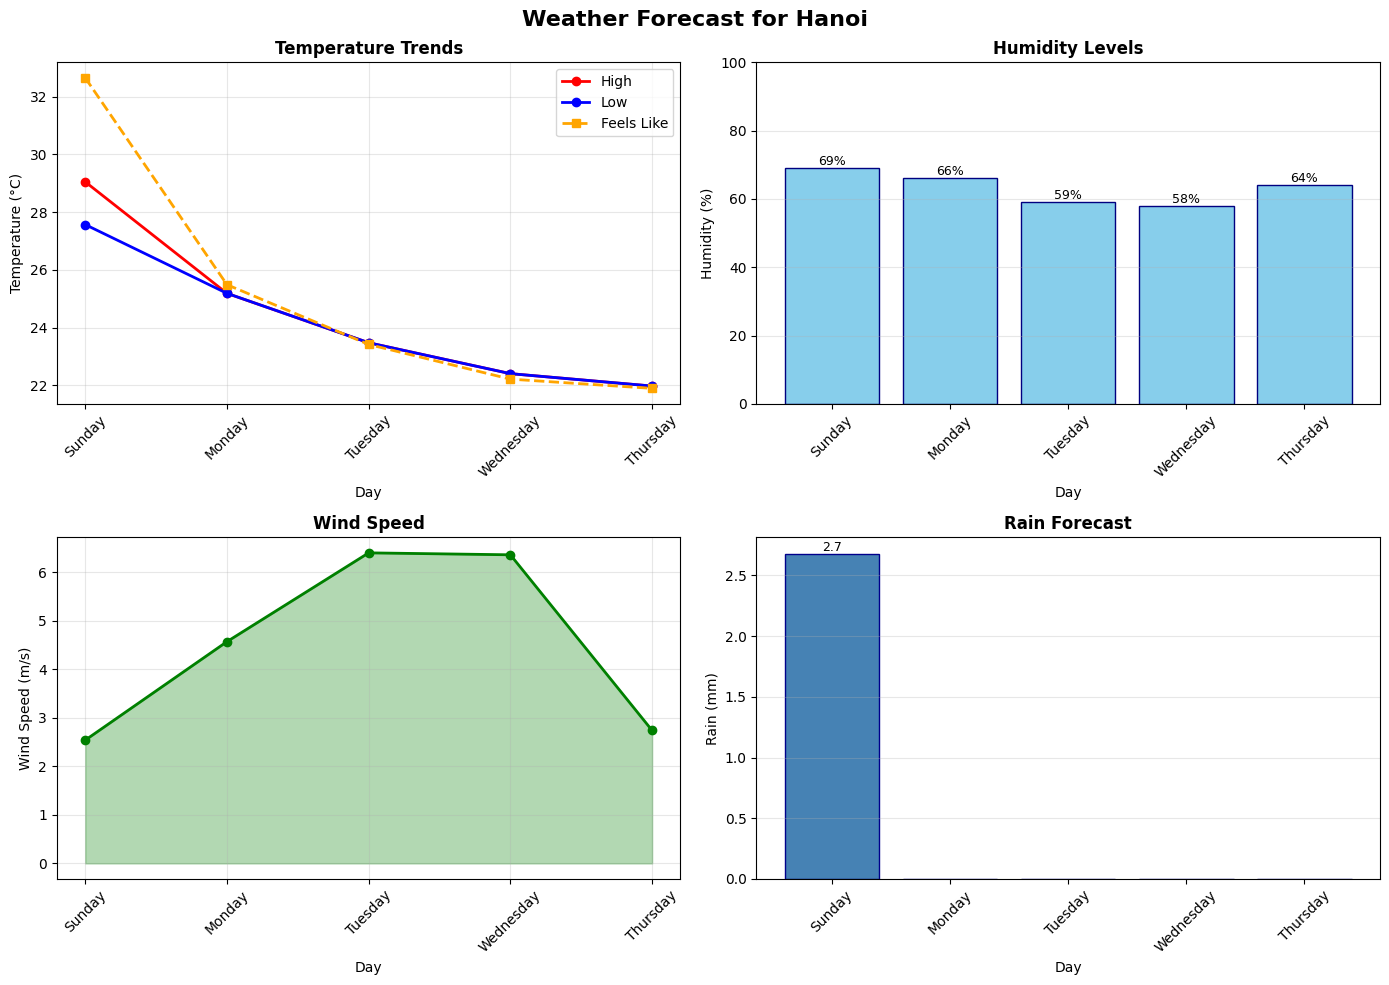


📊 Weather Data Table for Perth
      Date       Day  Temperature (°C)  High (°C)  Low (°C)  Feels Like (°C)  Condition  Humidity (%)  Rain (mm)  Wind Speed (m/s)
2025-10-19    Sunday             15.49      15.49     14.97            14.90 light rain            69       1.12              3.83
2025-10-20    Monday             13.95      13.95     13.95            13.31 light rain            73       0.89              5.27
2025-10-21   Tuesday             15.61      15.61     15.61            14.85 few clouds            62       0.00              5.10
2025-10-22 Wednesday             15.54      15.54     15.54            14.79 few clouds            63       0.00              5.34
2025-10-23  Thursday             16.45      16.45     16.45            15.72  clear sky            60       0.00              5.03




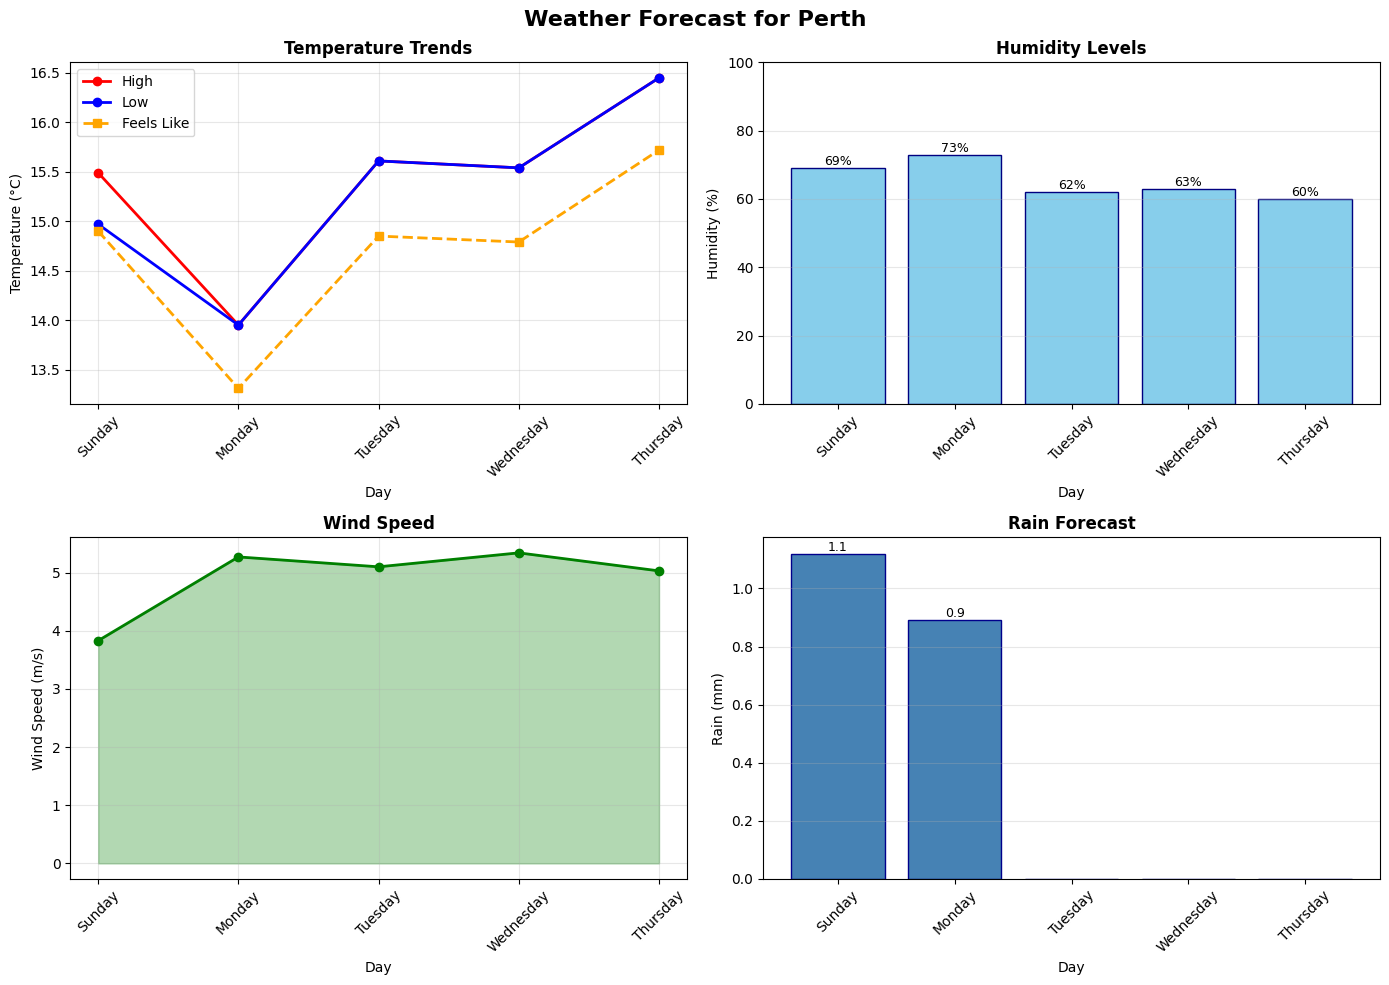


📊 Weather Data Table for Tokyo
      Date       Day  Temperature (°C)  High (°C)  Low (°C)  Feels Like (°C)       Condition  Humidity (%)  Rain (mm)  Wind Speed (m/s)
2025-10-19    Sunday             18.81      18.81     18.29            18.60      light rain            71       0.26              4.32
2025-10-20    Monday             19.00      19.00     19.00            18.86      light rain            73       0.68              6.67
2025-10-21   Tuesday             14.72      14.72     14.72            14.02      light rain            68       1.10              4.35
2025-10-22 Wednesday             13.31      13.31     13.31            12.39 overcast clouds            65       0.00              3.80
2025-10-23  Thursday             15.97      15.97     15.97            14.98   broken clouds            52       0.00              4.99




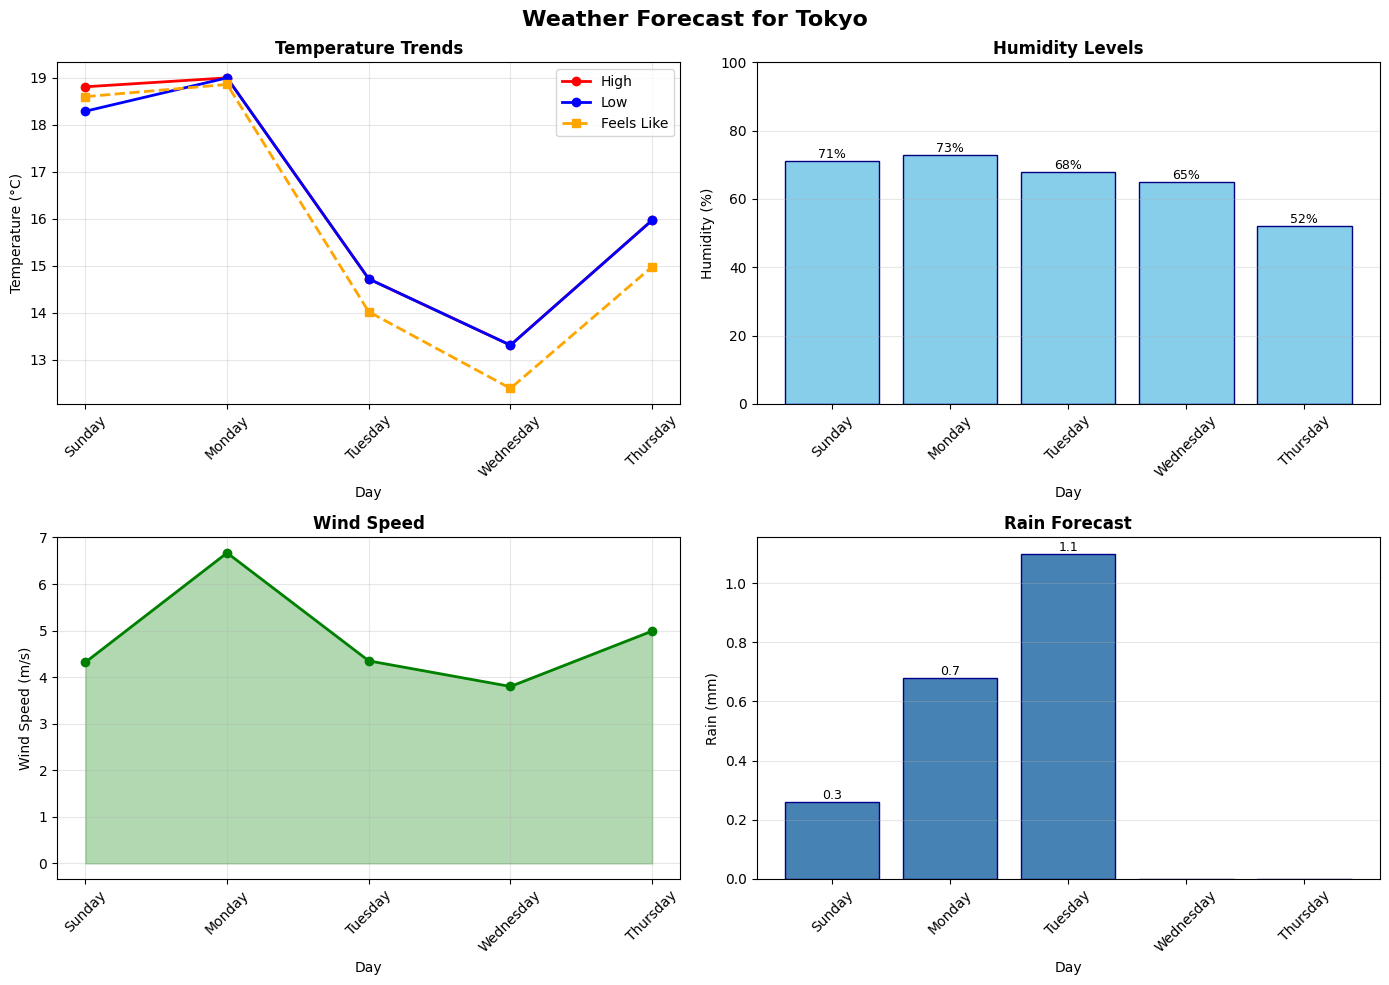

In [ ]:
def process_weather_to_dataframe(weather_data):
    """
    Convert OpenWeatherMap data into a pandas DataFrame.

    Args:
        weather_data (dict): Weather data from OpenWeatherMap

    Returns:
        pandas.DataFrame: Processed weather data
    """

    # Make sure we have data and forecast data
    if not weather_data or 'forecast' not in weather_data or 'list' not in weather_data['forecast']:
        print("No weather forecast data available!")
        return None

    # Lists to store data
    dates = []
    days = []
    temps = []
    temp_max = []
    temp_min = []
    feels_like = []
    humidity = []
    conditions = []
    rain = []
    wind_speed = []

    # Go through each forecast entry (only noon ones for daily forecast)
    current_date = None
    for item in weather_data['forecast']['list']:  # Access 'list' from 'forecast'
        # Parse the date/time
        date_time = datetime.strptime(item['dt_txt'], '%Y-%m-%d %H:%M:%S')
        date = date_time.date()

        # Only grab noon forecasts to avoid duplicates
        if date != current_date and date_time.hour == 12:
            current_date = date

            # Extract all the weather info
            dates.append(date)
            days.append(date.strftime('%A'))  # Day name
            temps.append(item['main']['temp'])
            temp_max.append(item['main']['temp_max'])
            temp_min.append(item['main']['temp_min'])
            feels_like.append(item['main']['feels_like'])
            humidity.append(item['main']['humidity'])
            conditions.append(item['weather'][0]['description'])
            rain.append(item.get('rain', {}).get('3h', 0))  # Rain in mm
            wind_speed.append(item['wind']['speed'])

    # Create the DataFrame
    df = pd.DataFrame({
        'Date': dates,
        'Day': days,
        'Temperature (°C)': temps,
        'High (°C)': temp_max,
        'Low (°C)': temp_min,
        'Feels Like (°C)': feels_like,
        'Condition': conditions,
        'Humidity (%)': humidity,
        'Rain (mm)': rain,
        'Wind Speed (m/s)': wind_speed
    })

    return df

def visualize_weather_data(df, city_name):
    """
    Create visualizations for the weather data.

    Args:
        df (pandas.DataFrame): Weather data
        city_name (str): Name of the city
    """

    if df is None or df.empty:
        print("No data to visualize!")
        return

    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Weather Forecast for {city_name}', fontsize=16, fontweight='bold')

    # 1. Temperature Trends (High, Low, Feels Like)
    ax1 = axes[0, 0]
    ax1.plot(df['Day'], df['High (°C)'], marker='o', label='High', color='red', linewidth=2)
    ax1.plot(df['Day'], df['Low (°C)'], marker='o', label='Low', color='blue', linewidth=2)
    ax1.plot(df['Day'], df['Feels Like (°C)'], marker='s', label='Feels Like',
             color='orange', linestyle='--', linewidth=2)
    ax1.set_title('Temperature Trends', fontweight='bold')
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Temperature (°C)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # 2. Humidity Levels
    ax2 = axes[0, 1]
    bars = ax2.bar(df['Day'], df['Humidity (%)'], color='skyblue', edgecolor='navy')
    ax2.set_title('Humidity Levels', fontweight='bold')
    ax2.set_xlabel('Day')
    ax2.set_ylabel('Humidity (%)')
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}%', ha='center', va='bottom', fontsize=9)

    # 3. Wind Speed
    ax3 = axes[1, 0]
    ax3.plot(df['Day'], df['Wind Speed (m/s)'], marker='o', color='green', linewidth=2)
    ax3.fill_between(range(len(df['Day'])), df['Wind Speed (m/s)'], alpha=0.3, color='green')
    ax3.set_title('Wind Speed', fontweight='bold')
    ax3.set_xlabel('Day')
    ax3.set_ylabel('Wind Speed (m/s)')
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)

    # 4. Rain Forecast
    ax4 = axes[1, 1]
    bars = ax4.bar(df['Day'], df['Rain (mm)'], color='steelblue', edgecolor='darkblue')
    ax4.set_title('Rain Forecast', fontweight='bold')
    ax4.set_xlabel('Day')
    ax4.set_ylabel('Rain (mm)')
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax4.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()


# This cell uses the weather data already retrieved from Cell 1
# Make sure you run Cell 1 first!

# The variable 'all_weather_data' from Cell 1 contains all the weather data
# It's a list, so we can visualize each city

if 'all_weather_data' in globals() and all_weather_data:
    # Loop through each city's weather data
    for weather_data in all_weather_data:
        city_name = weather_data['current']['name']

        # Create DataFrame
        df = process_weather_to_dataframe(weather_data)

        if df is not None:
            # Display the data table
            print("\n📊 Weather Data Table for", city_name)
            print("="*50)
            print(df.to_string(index=False))
            print("\n")

            # Create visualizations
            visualize_weather_data(df, city_name)
else:
    print("❌ No weather data found!")
    print("Please run 🌤️ Weather Data Functions first to get weather data.")

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
import re
from datetime import datetime, timedelta

def parse_weather_question(question, use_ollama=False, ollama_model="llama2"):
    """
    Parse a natural language weather question and extract key information.

    Args:
        question (str): The user's weather question
        use_ollama (bool): Whether to use Ollama API for better parsing
        ollama_model (str): Ollama model to use (e.g., "llama2", "mistral")

    Returns:
        dict: Contains 'city', 'query_type', 'time_frame', 'days_ahead', 'success', 'error'
    """

    # Initialize result dictionary with error handling
    result = {
        'city': None,
        'query_type': None,
        'time_frame': 'current',
        'days_ahead': 0,
        'success': False,
        'error': None
    }

    try:
        # Use Ollama API if requested
        if use_ollama:
            result = parse_with_ollama(question, ollama_model)
            if result['success']:
                return result
            # If Ollama fails, fall back to rule-based parsing
            print("⚠️ Ollama parsing failed, using rule-based parsing...")

        # Convert to lowercase for easier matching
        question_lower = question.lower().strip()

        if not question_lower:
            result['error'] = "Empty question provided"
            return result

        # Keywords for different query types
        query_keywords = {
            'temperature': ['temperature', 'temp', 'hot', 'cold', 'warm', 'cool', 'degrees', 'celsius', 'fahrenheit'],
            'rain': ['rain', 'rainy', 'raining', 'rainfall', 'precipitation', 'drizzle', 'shower'],
            'wind': ['wind', 'windy', 'breeze', 'breezy', 'gust'],
            'humidity': ['humidity', 'humid', 'moisture', 'damp'],
            'conditions': ['weather', 'conditions', 'like', 'sunny', 'cloudy', 'clear', 'forecast']
        }

        # Determine query type
        result['query_type'] = 'general'
        for qtype, keywords in query_keywords.items():
            if any(keyword in question_lower for keyword in keywords):
                result['query_type'] = qtype
                break

        # Advanced time frame detection
        time_result = detect_time_frame(question_lower)
        result['time_frame'] = time_result['time_frame']
        result['days_ahead'] = time_result['days_ahead']

        # Extract city name with improved logic
        city = extract_city_name(question)
        if city:
            result['city'] = city
            result['success'] = True
        else:
            result['error'] = "Could not identify city name in question"
            result['success'] = False

    except Exception as e:
        result['error'] = f"Error parsing question: {str(e)}"
        result['success'] = False

    return result


def parse_with_ollama(question, model="llama2"):
    """
    Use Ollama API to parse natural language weather questions.

    Args:
        question (str): The user's weather question
        model (str): Ollama model to use

    Returns:
        dict: Parsed data with city, query_type, time_frame
    """
    try:
        import requests

        # Ollama API endpoint (default local installation)
        url = "http://localhost:11434/api/generate"

        # Create a prompt for Ollama to extract information
        prompt = f"""Extract the following information from this weather question:
Question: "{question}"

Respond ONLY with a JSON object in this exact format:
{{"city": "city name", "query_type": "temperature/rain/wind/humidity/conditions/general", "time_frame": "current/forecast", "days_ahead": 0}}

Examples:
"What's the weather in New York?" -> {{"city": "New York", "query_type": "conditions", "time_frame": "current", "days_ahead": 0}}
"Will it rain tomorrow in Los Angeles?" -> {{"city": "Los Angeles", "query_type": "rain", "time_frame": "forecast", "days_ahead": 1}}

Now extract from the question above:"""

        # Call Ollama API
        response = requests.post(url, json={
            "model": model,
            "prompt": prompt,
            "stream": False
        })

        if response.status_code == 200:
            import json
            result_text = response.json().get('response', '')

            # Try to parse JSON from response
            parsed = json.loads(result_text)
            parsed['success'] = True
            parsed['error'] = None
            return parsed
        else:
            return {'success': False, 'error': f"Ollama API error: {response.status_code}"}

    except Exception as e:
        return {'success': False, 'error': f"Ollama error: {str(e)}"}


def detect_time_frame(question_lower):
    """
    Detect time frame from question with support for various phrases.

    Args:
        question_lower (str): Lowercase question text

    Returns:
        dict: Contains 'time_frame' and 'days_ahead'
    """

    result = {'time_frame': 'current', 'days_ahead': 0}

    # Day name mapping
    days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

    # Check for specific time phrases
    time_patterns = [
        (r'tomorrow', 1),
        (r'in (\d+) days?', None),  # "in 3 days"
        (r'(\d+) days? (from now|later)', None),  # "3 days from now"
        (r'next (\w+)', None),  # "next Friday"
        (r'this (\w+)', None),  # "this Friday"
    ]

    for pattern, days in time_patterns:
        match = re.search(pattern, question_lower)
        if match:
            result['time_frame'] = 'forecast'

            if days is not None:
                result['days_ahead'] = days
            elif pattern.startswith(r'in (\d+)') or pattern.startswith(r'(\d+)'):
                result['days_ahead'] = int(match.group(1))
            elif 'next' in pattern or 'this' in pattern:
                day_name = match.group(1)
                if day_name in days_of_week:
                    result['days_ahead'] = calculate_days_until(day_name)

            return result

    # Check for general forecast keywords
    forecast_keywords = ['forecast', 'future', 'upcoming', 'later', 'week', 'will']
    if any(keyword in question_lower for keyword in forecast_keywords):
        result['time_frame'] = 'forecast'
        result['days_ahead'] = 1  # Default to tomorrow

    return result


def calculate_days_until(target_day):
    """
    Calculate days until a specific day of the week.

    Args:
        target_day (str): Day name (e.g., "friday")

    Returns:
        int: Number of days ahead
    """
    days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

    today = datetime.now()
    current_day_index = today.weekday()
    target_day_index = days_of_week.index(target_day.lower())

    # Calculate days ahead
    days_ahead = (target_day_index - current_day_index) % 7
    if days_ahead == 0:
        days_ahead = 7  # Next week same day

    return days_ahead


def extract_city_name(question):
    """
    Extract city name from question with support for multi-word cities.

    Args:
        question (str): The weather question

    Returns:
        str: City name or None
    """

    # Common multi-word cities to check for
    known_cities = [
        'New York', 'Los Angeles', 'San Francisco', 'Las Vegas', 'New Orleans',
        'Salt Lake City', 'Kansas City', 'Oklahoma City', 'Jersey City',
        'Mexico City', 'Buenos Aires', 'Rio de Janeiro', 'Sao Paulo',
        'Hong Kong', 'Kuala Lumpur', 'New Delhi', 'Abu Dhabi', 'Tel Aviv',
        'Cape Town', 'Port Elizabeth', 'East London'
    ]

    # Check for known multi-word cities first
    question_title = question.title()
    for city in known_cities:
        if city in question_title:
            return city

    # Pattern-based extraction
    patterns = [
        r'\bin\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)',  # "in New York"
        r'\bat\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)',  # "at Los Angeles"
        r'\bfor\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)',  # "for San Francisco"
        r'^([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)\s+weather',  # "London weather"
        r'weather\s+in\s+([A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)',  # "weather in Paris"
    ]

    for pattern in patterns:
        match = re.search(pattern, question)
        if match:
            city = match.group(1).strip()
            # Filter out common words that aren't cities
            excluded_words = ['Today', 'Tomorrow', 'The', 'What', 'How', 'Is', 'Will', 'Weather']
            if city not in excluded_words:
                return city

    # Last resort: look for capitalized words
    words = question.split()
    potential_cities = []

    for i, word in enumerate(words):
        # Remove punctuation
        clean_word = word.strip('?.,!;:')

        if clean_word and clean_word[0].isupper() and len(clean_word) > 2:
            # Check if it's part of a multi-word city
            if i < len(words) - 1:
                next_word = words[i + 1].strip('?.,!;:')
                if next_word and len(next_word) > 0 and next_word[0].isupper():
                    potential_cities.append(f"{clean_word} {next_word}")
                    continue

            potential_cities.append(clean_word)

    # Return the most likely city (prefer multi-word cities)
    if potential_cities:
        return max(potential_cities, key=len)

    return None


def generate_weather_response(parsed_data, weather_data):
    """
    Generate a natural language response based on parsed question and weather data.

    Args:
        parsed_data (dict): Output from parse_weather_question()
        weather_data (dict): Weather data from get_weather_data_openweather()

    Returns:
        str: Natural language response
    """

    # Error handling for parsed data
    if not parsed_data.get('success', False):
        error_msg = parsed_data.get('error', 'Unknown error')
        return f"Sorry, I couldn't understand the question. {error_msg}"

    # Validate weather data structure
    if not weather_data:
        return "Sorry, I couldn't get the weather data."

    if 'current' not in weather_data:
        return "Sorry, the weather data is incomplete or in an unexpected format."

    try:
        current = weather_data['current']
        city_name = current.get('name', parsed_data.get('city', 'Unknown'))
        country = current.get('sys', {}).get('country', '')

        # Extract weather information with safe defaults
        temp = current.get('main', {}).get('temp', 'N/A')
        feels_like = current.get('main', {}).get('feels_like', 'N/A')
        humidity = current.get('main', {}).get('humidity', 'N/A')
        wind_speed = current.get('wind', {}).get('speed', 'N/A')
        description = current.get('weather', [{}])[0].get('description', 'unknown')

        # Generate response based on query type and time frame
        query_type = parsed_data.get('query_type', 'general')
        time_frame = parsed_data.get('time_frame', 'current')
        days_ahead = parsed_data.get('days_ahead', 0)

        # Handle forecast requests
        if time_frame == 'forecast' and 'forecast' in weather_data:
            return generate_forecast_response(
                parsed_data, weather_data, city_name, country
            )

        # Current weather responses
        location_str = f"{city_name}, {country}" if country else city_name

        if query_type == 'temperature':
            return f"The current temperature in {location_str} is {temp}°C. It feels like {feels_like}°C."

        elif query_type == 'rain':
            rain_amount = current.get('rain', {}).get('1h', 0)
            if rain_amount > 0:
                return f"Yes, it's currently raining in {location_str}. About {rain_amount}mm in the last hour. The conditions are {description}."
            else:
                return f"No, it's not raining in {location_str} right now. The weather is {description}."

        elif query_type == 'wind':
            return f"The wind speed in {location_str} is {wind_speed} m/s."

        elif query_type == 'humidity':
            return f"The humidity in {location_str} is {humidity}%."

        elif query_type == 'conditions':
            return f"The weather in {location_str} is currently {description} with a temperature of {temp}°C."

        else:
            # General response
            return f"In {location_str}: {description.title()}, {temp}°C (feels like {feels_like}°C), humidity {humidity}%, wind {wind_speed} m/s."

    except Exception as e:
        return f"Sorry, I encountered an error processing the weather data: {str(e)}"


def generate_forecast_response(parsed_data, weather_data, city_name, country):
    """
    Generate forecast response with support for specific days ahead.

    Args:
        parsed_data (dict): Parsed question data
        weather_data (dict): Weather data with forecast
        city_name (str): City name
        country (str): Country code

    Returns:
        str: Forecast response
    """

    try:
        forecast_list = weather_data['forecast']['list']
        days_ahead = parsed_data.get('days_ahead', 1)
        query_type = parsed_data.get('query_type', 'general')

        # Find forecast for the target day
        target_date = datetime.now() + timedelta(days=days_ahead)
        target_forecast = None

        for item in forecast_list:
            forecast_time = datetime.strptime(item['dt_txt'], '%Y-%m-%d %H:%M:%S')

            # Look for noon forecast on target day
            if forecast_time.date() == target_date.date() and forecast_time.hour == 12:
                target_forecast = item
                break

        if not target_forecast and forecast_list:
            # Fallback to closest available forecast
            target_forecast = forecast_list[min(days_ahead * 8, len(forecast_list) - 1)]

        if target_forecast:
            temp = target_forecast['main']['temp']
            description = target_forecast['weather'][0]['description']
            rain_amount = target_forecast.get('rain', {}).get('3h', 0)
            wind_speed = target_forecast['wind']['speed']
            humidity = target_forecast['main']['humidity']

            # Time phrase
            if days_ahead == 1:
                time_phrase = "tomorrow"
            elif days_ahead == 0:
                time_phrase = "today"
            else:
                time_phrase = f"in {days_ahead} days"

            location_str = f"{city_name}, {country}" if country else city_name

            if query_type == 'temperature':
                return f"{time_phrase.capitalize()} in {location_str}, the temperature will be around {temp}°C with {description}."
            elif query_type == 'rain':
                if rain_amount > 0:
                    return f"Yes, rain is expected in {location_str} {time_phrase}. About {rain_amount}mm of rainfall with {description}."
                else:
                    return f"No rain is expected in {location_str} {time_phrase}. It should be {description}."
            elif query_type == 'wind':
                return f"The wind speed {time_phrase} in {location_str} will be around {wind_speed} m/s."
            elif query_type == 'humidity':
                return f"The humidity {time_phrase} in {location_str} will be around {humidity}%."
            else:
                return f"{time_phrase.capitalize()} in {location_str}, expect {description} with a temperature of {temp}°C."
        else:
            return f"Sorry, I don't have forecast data available for {days_ahead} days ahead."

    except Exception as e:
        return f"Sorry, I encountered an error processing the forecast: {str(e)}"


# Example usage:
# question = "What's the temperature in New York tomorrow?"
# parsed = parse_weather_question(question, use_ollama=False)
# print("Parsed data:", parsed)

# if parsed['success']:
#     weather_data = get_weather_data_openweather(parsed['city'])
#     response = generate_weather_response(parsed, weather_data)
#     print("Response:", response)
# else:
#     print("Error:", parsed['error'])

## 🧭 User Interface

In [ ]:
def weather_menu_pyinputplus():
    """
    Modern interactive menu for weather dashboard using pyinputplus.
    Enhanced with colors and better formatting.
    """

    # ANSI color codes for modern terminal styling
    COLORS = {
        'HEADER': '\033[95m',
        'BLUE': '\033[94m',
        'CYAN': '\033[96m',
        'GREEN': '\033[92m',
        'YELLOW': '\033[93m',
        'RED': '\033[91m',
        'BOLD': '\033[1m',
        'UNDERLINE': '\033[4m',
        'END': '\033[0m'
    }

    def print_header():
        """Print a stylish header."""
        print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
        print(f"{COLORS['BOLD']}{COLORS['BLUE']}        🌤️  WEATHER DASHBOARD  ⛅{COLORS['END']}")
        print(f"{COLORS['CYAN']}        Your Personal Weather Companion{COLORS['END']}")
        print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")

        # Show current time
        current_time = datetime.now().strftime("%A, %B %d, %Y • %I:%M %p")
        print(f"{COLORS['YELLOW']}        📅 {current_time}{COLORS['END']}")
        print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}\n")

    def print_section_header(title, icon):
        """Print a section header."""
        print(f"\n{COLORS['BOLD']}{COLORS['GREEN']}{icon} {title}{COLORS['END']}")
        print(f"{COLORS['CYAN']}{'─' * 60}{COLORS['END']}")

    print_header()

    while True:
        # Menu options with emojis
        menu_options = [
            '🌡️  View Current Weather',
            '📅 View 5-Day Forecast',
            '💬 Ask Natural Language Question',
            '📊 Visualize Weather Data',
            '🌍 Compare Multiple Cities',
            '❌ Exit Dashboard'
        ]

        print(f"{COLORS['BOLD']}What would you like to do?{COLORS['END']}")
        print(f"{COLORS['CYAN']}{'─' * 60}{COLORS['END']}")

        menu_choice = pyip.inputMenu(
            menu_options,
            numbered=True,
            prompt=f'\n{COLORS["YELLOW"]}➜ Select an option:{COLORS["END"]}\n'
        )

        # Handle menu choices
        if '🌡️' in menu_choice:
            handle_current_weather_modern(COLORS)

        elif '📅' in menu_choice:
            handle_forecast_modern(COLORS)

        elif '💬' in menu_choice:
            handle_natural_language_modern(COLORS)

        elif '📊' in menu_choice:
            handle_visualization_modern(COLORS)

        elif '🌍' in menu_choice:
            handle_comparison_modern(COLORS)

        elif '❌' in menu_choice:
            print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
            print(f"{COLORS['BOLD']}{COLORS['GREEN']}   👋 Thank you for using Weather Dashboard!{COLORS['END']}")
            print(f"{COLORS['CYAN']}   Stay safe and enjoy your day!{COLORS['END']}")
            print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}\n")
            break


def handle_current_weather_modern(COLORS):
    """Handle viewing current weather with modern styling."""
    print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['BOLD']}{COLORS['BLUE']}🌡️  CURRENT WEATHER{COLORS['END']}")
    print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")

    city = pyip.inputStr(
        prompt=f"{COLORS['YELLOW']}📍 Enter city name: {COLORS['END']}",
        blank=False
    )

    print(f"\n{COLORS['CYAN']}🔍 Fetching live weather data for {COLORS['BOLD']}{city}{COLORS['END']}{COLORS['CYAN']}...{COLORS['END']}")

    weather_data = get_weather_data_openweather(city)

    if weather_data:
        display_weather_for_city(weather_data)
        print(f"{COLORS['GREEN']}✓ Data retrieved successfully!{COLORS['END']}")
    else:
        print(f"{COLORS['RED']}❌ Could not retrieve weather data for {city}{COLORS['END']}")

    pyip.inputStr(prompt=f"\n{COLORS['YELLOW']}Press Enter to return to menu...{COLORS['END']}")


def handle_forecast_modern(COLORS):
    """Handle viewing weather forecast with modern styling."""
    print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['BOLD']}{COLORS['BLUE']}📅 WEATHER FORECAST{COLORS['END']}")
    print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")

    city = pyip.inputStr(
        prompt=f"{COLORS['YELLOW']}📍 Enter city name: {COLORS['END']}",
        blank=False
    )

    days = pyip.inputInt(
        prompt=f"{COLORS['YELLOW']}📆 How many days ahead? (1-5): {COLORS['END']}",
        min=1,
        max=5,
        default=5
    )

    print(f"\n{COLORS['CYAN']}🔍 Fetching {days}-day forecast for {COLORS['BOLD']}{city}{COLORS['END']}{COLORS['CYAN']}...{COLORS['END']}")

    weather_data = get_weather_data_openweather(city, forecast_days=days)

    if weather_data:
        display_weather_for_city(weather_data)
        print(f"{COLORS['GREEN']}✓ Forecast retrieved successfully!{COLORS['END']}")
    else:
        print(f"{COLORS['RED']}❌ Could not retrieve weather data for {city}{COLORS['END']}")

    pyip.inputStr(prompt=f"\n{COLORS['YELLOW']}Press Enter to return to menu...{COLORS['END']}")


def handle_natural_language_modern(COLORS):
    """Handle natural language questions with modern styling."""
    print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['BOLD']}{COLORS['BLUE']}💬 ASK A WEATHER QUESTION{COLORS['END']}")
    print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['CYAN']}💡 Examples:{COLORS['END']}")
    print(f"   • What's the temperature in London?")
    print(f"   • Will it rain tomorrow in Paris?")
    print(f"   • How windy is it in New York?")
    print(f"{COLORS['CYAN']}{'─' * 60}{COLORS['END']}")

    question = pyip.inputStr(
        prompt=f"{COLORS['YELLOW']}❓ Your question: {COLORS['END']}",
        blank=False
    )

    use_ollama = pyip.inputYesNo(
        prompt=f"{COLORS['YELLOW']}🤖 Use AI (Ollama) for better understanding? (yes/no): {COLORS['END']}",
        default='no'
    ) == 'yes'

    print(f"\n{COLORS['CYAN']}🔍 Processing your question...{COLORS['END']}")

    parsed = parse_weather_question(question, use_ollama=use_ollama)

    if parsed['success']:
        print(f"{COLORS['GREEN']}✓ Understood: Looking for {COLORS['BOLD']}{parsed['query_type']}{COLORS['END']}{COLORS['GREEN']} in {COLORS['BOLD']}{parsed['city']}{COLORS['END']}")

        weather_data = get_weather_data_openweather(parsed['city'])

        if weather_data:
            response = generate_weather_response(parsed, weather_data)
            print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
            print(f"{COLORS['BOLD']}{COLORS['GREEN']}🤖 ANSWER:{COLORS['END']}")
            print(f"{COLORS['CYAN']}{'─' * 60}{COLORS['END']}")
            print(f"{COLORS['BOLD']}{response}{COLORS['END']}")
            print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
        else:
            print(f"{COLORS['RED']}❌ Could not retrieve weather data for {parsed['city']}{COLORS['END']}")
    else:
        print(f"{COLORS['RED']}❌ {parsed['error']}{COLORS['END']}")

    pyip.inputStr(prompt=f"\n{COLORS['YELLOW']}Press Enter to return to menu...{COLORS['END']}")


def handle_visualization_modern(COLORS):
    """Handle weather visualization with modern styling."""
    print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['BOLD']}{COLORS['BLUE']}📊 VISUALIZE WEATHER DATA{COLORS['END']}")
    print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")

    city = pyip.inputStr(
        prompt=f"{COLORS['YELLOW']}📍 Enter city name: {COLORS['END']}",
        blank=False
    )

    print(f"\n{COLORS['CYAN']}🔍 Fetching weather data for {COLORS['BOLD']}{city}{COLORS['END']}{COLORS['CYAN']}...{COLORS['END']}")

    weather_data = get_weather_data_openweather(city)

    if weather_data:
        df = process_weather_to_dataframe(weather_data)

        if df is not None:
            print(f"\n{COLORS['GREEN']}✓ Data processed successfully!{COLORS['END']}")
            print(f"\n{COLORS['BOLD']}{COLORS['BLUE']}📊 Weather Data Table:{COLORS['END']}")
            print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
            print(df.to_string(index=False))

            show_graphs = pyip.inputYesNo(
                prompt=f"\n{COLORS['YELLOW']}📈 Show visualizations? (yes/no): {COLORS['END']}",
                default='yes'
            )

            if show_graphs == 'yes':
                print(f"{COLORS['CYAN']}🎨 Generating visualizations...{COLORS['END']}")
                visualize_weather_data(df, city)
                print(f"{COLORS['GREEN']}✓ Visualizations complete!{COLORS['END']}")
        else:
            print(f"{COLORS['RED']}❌ Could not process weather data{COLORS['END']}")
    else:
        print(f"{COLORS['RED']}❌ Could not retrieve weather data for {city}{COLORS['END']}")

    pyip.inputStr(prompt=f"\n{COLORS['YELLOW']}Press Enter to return to menu...{COLORS['END']}")


def handle_comparison_modern(COLORS):
    """Handle comparing multiple cities with modern styling."""
    print(f"\n{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")
    print(f"{COLORS['BOLD']}{COLORS['BLUE']}🌍 COMPARE MULTIPLE CITIES{COLORS['END']}")
    print(f"{COLORS['CYAN']}{'═' * 60}{COLORS['END']}")

    cities_input = pyip.inputStr(
        prompt=f"{COLORS['YELLOW']}📍 Enter cities (comma-separated):\n   Example: London, Paris, Tokyo\n   ➜ {COLORS['END']}",
        blank=False
    )

    is_valid, result = validate_city_input(cities_input)

    if is_valid:
        city_list = result
        print(f"\n{COLORS['CYAN']}🔍 Fetching weather data for {COLORS['BOLD']}{len(city_list)} cities{COLORS['END']}{COLORS['CYAN']}...{COLORS['END']}")

        create_weather_dashboard(city_list)
        print(f"\n{COLORS['GREEN']}✓ Comparison complete!{COLORS['END']}")
    else:
        print(f"{COLORS['RED']}❌ {result}{COLORS['END']}")

    pyip.inputStr(prompt=f"\n{COLORS['YELLOW']}Press Enter to return to menu...{COLORS['END']}")


# ============================================
# MODERN IPYWIDGETS VERSION (for Jupyter)
# ============================================

def weather_menu_ipywidgets():
    """
    Modern, minimalist interactive menu using ipywidgets.
    Perfect for Jupyter Notebooks with a clean, professional design.
    """

    from ipywidgets import widgets, VBox, HBox, Output, Layout, HTML
    from IPython.display import display, clear_output

    # Custom CSS styling for modern look
    custom_css = """
    <style>
        .weather-header {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 30px;
            border-radius: 15px;
            text-align: center;
            margin-bottom: 20px;
            box-shadow: 0 10px 30px rgba(0,0,0,0.2);
        }
        .weather-section {
            background: #f8f9fa;
            padding: 20px;
            border-radius: 10px;
            margin: 10px 0;
            border-left: 4px solid #667eea;
        }
        .section-title {
            color: #667eea;
            font-size: 18px;
            font-weight: bold;
            margin-bottom: 10px;
        }
    </style>
    """

    # Output area for results
    output = Output(layout=Layout(
        border='2px solid #e0e0e0',
        border_radius='10px',
        padding='20px',
        margin='20px 0',
        min_height='200px'
    ))

    # Modern header
    header = HTML(
        custom_css +
        """
        <div class="weather-header">
            <h1>🌤️ Weather Dashboard</h1>
            <p style="font-size: 16px; margin-top: 10px;">Your Personal Weather Companion</p>
        </div>
        """
    )

    # Styled buttons with modern look
    button_style = Layout(
        width='180px',
        height='45px',
        margin='5px'
    )

    btn_current = widgets.Button(
        description='Current Weather',
        button_style='info',
        icon='thermometer-half',
        layout=button_style,
        tooltip='View current weather conditions'
    )

    btn_forecast = widgets.Button(
        description='5-Day Forecast',
        button_style='info',
        icon='calendar',
        layout=button_style,
        tooltip='View weather forecast'
    )

    btn_nlp = widgets.Button(
        description='Ask Question',
        button_style='success',
        icon='comments',
        layout=button_style,
        tooltip='Ask in natural language'
    )

    btn_visualize = widgets.Button(
        description='Visualize Data',
        button_style='warning',
        icon='chart-line',
        layout=button_style,
        tooltip='Create weather charts'
    )

    btn_compare = widgets.Button(
        description='Compare Cities',
        button_style='primary',
        icon='globe',
        layout=button_style,
        tooltip='Compare multiple locations'
    )

    btn_clear = widgets.Button(
        description='Clear Output',
        button_style='danger',
        icon='trash',
        layout=Layout(width='150px', height='35px', margin='5px'),
        tooltip='Clear the output area'
    )

    # Modern input widgets with styling
    input_layout = Layout(width='400px', margin='5px 0')

    city_input = widgets.Text(
        description='🏙️ City:',
        placeholder='Enter city name (e.g., London)',
        layout=input_layout,
        style={'description_width': '80px'}
    )

    question_input = widgets.Textarea(
        description='💬 Question:',
        placeholder='What\'s the weather like in Paris tomorrow?',
        layout=Layout(width='400px', height='80px', margin='5px 0'),
        style={'description_width': '80px'}
    )

    cities_input = widgets.Text(
        description='🌍 Cities:',
        placeholder='London, Paris, Tokyo (comma-separated)',
        layout=input_layout,
        style={'description_width': '80px'}
    )

    days_slider = widgets.IntSlider(
        value=5,
        min=1,
        max=5,
        step=1,
        description='📅 Days:',
        continuous_update=False,
        layout=Layout(width='400px', margin='5px 0'),
        style={'description_width': '80px'}
    )

    ollama_checkbox = widgets.Checkbox(
        value=False,
        description='🤖 Use AI (Ollama)',
        indent=False,
        layout=Layout(margin='10px 0')
    )

    # Button click handlers
    def on_current_click(b):
        with output:
            clear_output()
            print("═" * 60)
            print("🌡️  CURRENT WEATHER")
            print("═" * 60)
            if city_input.value:
                print(f"\n🔍 Fetching weather for {city_input.value}...")
                weather_data = get_weather_data_openweather(city_input.value)
                if weather_data:
                    display_weather_for_city(weather_data)
                    print("\n✓ Data retrieved successfully!")
                else:
                    print(f"\n❌ Could not retrieve data for {city_input.value}")
            else:
                print("\n⚠️  Please enter a city name")

    def on_forecast_click(b):
        with output:
            clear_output()
            print("═" * 60)
            print("📅 WEATHER FORECAST")
            print("═" * 60)
            if city_input.value:
                print(f"\n🔍 Fetching {days_slider.value}-day forecast for {city_input.value}...")
                weather_data = get_weather_data_openweather(city_input.value, forecast_days=days_slider.value)
                if weather_data:
                    display_weather_for_city(weather_data)
                    print("\n✓ Forecast retrieved successfully!")
                else:
                    print(f"\n❌ Could not retrieve data for {city_input.value}")
            else:
                print("\n⚠️  Please enter a city name")

    def on_nlp_click(b):
        with output:
            clear_output()
            print("═" * 60)
            print("💬 NATURAL LANGUAGE QUERY")
            print("═" * 60)
            if question_input.value:
                print(f"\n🔍 Processing your question...")
                parsed = parse_weather_question(question_input.value, use_ollama=ollama_checkbox.value)

                if parsed['success']:
                    print(f"✓ Understood: {parsed['query_type']} in {parsed['city']}\n")
                    weather_data = get_weather_data_openweather(parsed['city'])
                    if weather_data:
                        response = generate_weather_response(parsed, weather_data)
                        print("═" * 60)
                        print("🤖 ANSWER:")
                        print("─" * 60)
                        print(response)
                        print("═" * 60)
                    else:
                        print(f"\n❌ Could not retrieve data for {parsed['city']}")
                else:
                    print(f"\n❌ {parsed['error']}")
            else:
                print("\n⚠️  Please enter a question")

    def on_visualize_click(b):
        with output:
            clear_output()
            print("═" * 60)
            print("📊 WEATHER DATA VISUALIZATION")
            print("═" * 60)
            if city_input.value:
                print(f"\n🔍 Creating visualizations for {city_input.value}...")
                weather_data = get_weather_data_openweather(city_input.value)
                if weather_data:
                    df = process_weather_to_dataframe(weather_data)
                    if df is not None:
                        print("\n✓ Data processed successfully!\n")
                        print("📊 Weather Data Table:")
                        print("─" * 60)
                        print(df.to_string(index=False))
                        print("\n🎨 Generating visualizations...")
                        visualize_weather_data(df, city_input.value)
                        print("\n✓ Visualizations complete!")
                    else:
                        print("\n❌ Could not process data")
                else:
                    print(f"\n❌ Could not retrieve data for {city_input.value}")
            else:
                print("\n⚠️  Please enter a city name")

    def on_compare_click(b):
        with output:
            clear_output()
            print("═" * 60)
            print("🌍 COMPARE MULTIPLE CITIES")
            print("═" * 60)
            if cities_input.value:
                is_valid, result = validate_city_input(cities_input.value)
                if is_valid:
                    print(f"\n🔍 Comparing {len(result)} cities...\n")
                    create_weather_dashboard(result)
                    print("\n✓ Comparison complete!")
                else:
                    print(f"\n❌ {result}")
            else:
                print("\n⚠️  Please enter cities separated by commas")

    def on_clear_click(b):
        with output:
            clear_output()
            print("✨ Output cleared. Ready for new queries!")

    # Connect buttons to handlers
    btn_current.on_click(on_current_click)
    btn_forecast.on_click(on_forecast_click)
    btn_nlp.on_click(on_nlp_click)
    btn_visualize.on_click(on_visualize_click)
    btn_compare.on_click(on_compare_click)
    btn_clear.on_click(on_clear_click)

    # Layout sections with modern styling
    section1 = VBox([
        HTML('<div class="section-title">📍 Single City Weather</div>'),
        city_input,
        days_slider,
        HBox([btn_current, btn_forecast, btn_visualize], layout=Layout(flex_flow='row wrap'))
    ], layout=Layout(
        padding='20px',
        margin='10px 0',
        border='1px solid #e0e0e0',
        border_radius='10px',
        background_color='#ffffff'
    ))

    section2 = VBox([
        HTML('<div class="section-title">💬 Natural Language Query</div>'),
        question_input,
        ollama_checkbox,
        btn_nlp
    ], layout=Layout(
        padding='20px',
        margin='10px 0',
        border='1px solid #e0e0e0',
        border_radius='10px',
        background_color='#ffffff'
    ))

    section3 = VBox([
        HTML('<div class="section-title">🌍 Compare Multiple Cities</div>'),
        cities_input,
        btn_compare
    ], layout=Layout(
        padding='20px',
        margin='10px 0',
        border='1px solid #e0e0e0',
        border_radius='10px',
        background_color='#ffffff'
    ))

    # Main interface
    interface = VBox([
        header,
        section1,
        section2,
        section3,
        HBox([btn_clear], layout=Layout(justify_content='flex-end', margin='10px 0')),
        output
    ], layout=Layout(
        padding='20px',
        max_width='800px',
        margin='0 auto'
    ))

    display(interface)


# How to use:
# For terminal/console (with colors):
# weather_menu_pyinputplus()

# For Jupyter Notebook (modern UI):
weather_menu_ipywidgets()

## 🧩 Main Application Logic

In [ ]:
"""
WEATHER DASHBOARD - MAIN APPLICATION
====================================
Refactored version with improved architecture, modularity, and maintainability.
Run this cell to start the Weather Dashboard application.
"""

import sys
import logging
from typing import Callable, Dict, Optional, List
from functools import wraps

# ============================================
# LOGGING CONFIGURATION
# ============================================

logging.basicConfig(
    level=logging.INFO,
    format='%(levelname)s: %(message)s'
)
logger = logging.getLogger(__name__)

# ============================================
# DEPENDENCY & FUNCTION REGISTRY
# ============================================

class DependencyManager:
    """Centralized dependency and function validation."""

    REQUIRED_MODULES = {
        'requests': 'API calls',
        'pandas': 'Data processing',
        'matplotlib': 'Visualizations',
    }

    OPTIONAL_MODULES = {
        'pyinputplus': 'Terminal menu',
        'ipywidgets': 'Jupyter widgets'
    }

    # Registry of required functions (set by external code)
    function_registry: Dict[str, Callable] = {}

    @classmethod
    def register_function(cls, name: str, func: Callable):
        """Register a function in the global registry."""
        cls.function_registry[name] = func

    @classmethod
    def get_function(cls, name: str) -> Optional[Callable]:
        """Retrieve a registered function."""
        return cls.function_registry.get(name)

    @classmethod
    def check_dependencies(cls) -> Dict[str, bool]:
        """Check all required dependencies."""
        results = {'required': {}, 'optional': {}}

        for module, purpose in cls.REQUIRED_MODULES.items():
            try:
                __import__(module)
                results['required'][module] = True
            except ImportError:
                results['required'][module] = False
                logger.warning(f"Missing required module: {module} ({purpose})")

        for module, purpose in cls.OPTIONAL_MODULES.items():
            try:
                __import__(module)
                results['optional'][module] = True
            except ImportError:
                results['optional'][module] = False
                logger.info(f"Optional module not available: {module} ({purpose})")

        return results

    @classmethod
    def check_functions(cls, required_functions: List[str]) -> Dict[str, bool]:
        """Check if required functions are registered."""
        results = {}
        for func_name in required_functions:
            results[func_name] = func_name in cls.function_registry
            if not results[func_name]:
                logger.warning(f"Missing required function: {func_name}")
        return results

    @classmethod
    def all_dependencies_met(cls) -> bool:
        """Check if all required dependencies are available."""
        deps = cls.check_dependencies()
        return all(deps['required'].values())

    @classmethod
    def all_functions_available(cls, required_functions: List[str]) -> bool:
        """Check if all required functions are available."""
        funcs = cls.check_functions(required_functions)
        return all(funcs.values())


# ============================================
# ERROR HANDLING DECORATORS
# ============================================

def handle_errors(default_return=None):
    """Unified error handler decorator."""
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            try:
                return func(*args, **kwargs)
            except KeyboardInterrupt:
                logger.info("\nOperation cancelled by user")
                return default_return
            except Exception as e:
                logger.error(f"Error in {func.__name__}: {e}")
                return default_return
        return wrapper
    return decorator


# ============================================
# INPUT VALIDATION LAYER
# ============================================

class InputValidator:
    """Centralized input validation for all user inputs."""

    # Common cities database for auto-correction
    KNOWN_CITIES = [
        'London', 'Paris', 'Tokyo', 'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
        'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville',
        'Fort Worth', 'Columbus', 'Charlotte', 'San Francisco', 'Indianapolis', 'Seattle', 'Denver',
        'Washington', 'Boston', 'El Paso', 'Nashville', 'Detroit', 'Oklahoma City', 'Portland',
        'Las Vegas', 'Memphis', 'Louisville', 'Baltimore', 'Milwaukee', 'Albuquerque', 'Tucson',
        'Fresno', 'Sacramento', 'Kansas City', 'Mesa', 'Atlanta', 'Omaha', 'Colorado Springs',
        'Raleigh', 'Miami', 'Long Beach', 'Virginia Beach', 'Oakland', 'Minneapolis', 'Tulsa',
        'Tampa', 'Arlington', 'New Orleans', 'Wichita', 'Cleveland', 'Bakersfield', 'Aurora',
        'Anaheim', 'Honolulu', 'Santa Ana', 'Riverside', 'Corpus Christi', 'Lexington', 'Henderson',
        'Stockton', 'Saint Paul', 'Cincinnati', 'St. Louis', 'Pittsburgh', 'Greensboro', 'Lincoln',
        'Anchorage', 'Plano', 'Orlando', 'Irvine', 'Newark', 'Durham', 'Chula Vista', 'Toledo',
        'Fort Wayne', 'St. Petersburg', 'Laredo', 'Jersey City', 'Chandler', 'Madison', 'Lubbock',
        'Scottsdale', 'Reno', 'Buffalo', 'Gilbert', 'Glendale', 'North Las Vegas', 'Winston-Salem',
        'Chesapeake', 'Norfolk', 'Fremont', 'Garland', 'Irving', 'Hialeah', 'Richmond', 'Boise',
        'Spokane', 'Baton Rouge', 'Tacoma', 'San Bernardino', 'Modesto', 'Fontana', 'Des Moines',
        'Birmingham', 'Berlin', 'Madrid', 'Rome', 'Vienna', 'Amsterdam', 'Brussels', 'Copenhagen',
        'Dublin', 'Helsinki', 'Lisbon', 'Oslo', 'Prague', 'Stockholm', 'Warsaw', 'Athens',
        'Budapest', 'Bucharest', 'Sofia', 'Zagreb', 'Belgrade', 'Bratislava', 'Ljubljana',
        'Vilnius', 'Tallinn', 'Riga', 'Luxembourg', 'Valletta', 'Nicosia', 'Reykjavik',
        'Moscow', 'Saint Petersburg', 'Kiev', 'Minsk', 'Istanbul', 'Ankara', 'Tehran',
        'Baghdad', 'Riyadh', 'Dubai', 'Abu Dhabi', 'Doha', 'Kuwait City', 'Beirut', 'Damascus',
        'Jerusalem', 'Cairo', 'Casablanca', 'Algiers', 'Tunis', 'Tripoli', 'Khartoum',
        'Addis Ababa', 'Nairobi', 'Kampala', 'Dar es Salaam', 'Johannesburg', 'Cape Town',
        'Durban', 'Pretoria', 'Lagos', 'Accra', 'Dakar', 'Abidjan', 'Kinshasa', 'Luanda',
        'Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chengdu', 'Hangzhou', 'Wuhan',
        'Hong Kong', 'Taipei', 'Seoul', 'Busan', 'Pyongyang', 'Ulaanbaatar', 'Bangkok',
        'Singapore', 'Kuala Lumpur', 'Jakarta', 'Manila', 'Ho Chi Minh City', 'Hanoi',
        'Yangon', 'Phnom Penh', 'Vientiane', 'Dhaka', 'Karachi', 'Lahore', 'Islamabad',
        'Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Pune', 'Ahmedabad',
        'Kathmandu', 'Colombo', 'Kabul', 'Tashkent', 'Almaty', 'Astana', 'Bishkek', 'Dushanbe',
        'Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Auckland', 'Wellington',
        'Mexico City', 'Guadalajara', 'Monterrey', 'Puebla', 'Tijuana', 'Guatemala City',
        'San Salvador', 'Managua', 'San Jose', 'Panama City', 'Havana', 'Kingston',
        'Port-au-Prince', 'Santo Domingo', 'Caracas', 'Bogota', 'Quito', 'Lima', 'La Paz',
        'Santiago', 'Buenos Aires', 'Montevideo', 'Asuncion', 'Brasilia', 'Sao Paulo',
        'Rio de Janeiro', 'Belo Horizonte', 'Recife', 'Salvador'
    ]

    @staticmethod
    def levenshtein_distance(s1: str, s2: str) -> int:
        """Calculate the Levenshtein distance between two strings."""
        if len(s1) < len(s2):
            return InputValidator.levenshtein_distance(s2, s1)

        if len(s2) == 0:
            return len(s1)

        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row

        return previous_row[-1]

    @staticmethod
    def auto_correct_city(city: str) -> tuple[str, bool, list]:
        """
        Auto-correct a city name using fuzzy matching.

        Returns:
            tuple: (corrected_city, was_corrected, suggestions)
        """
        # Capitalize first letter of each word
        city_formatted = city.title()

        # If exact match found, return it
        if city_formatted in InputValidator.KNOWN_CITIES:
            return city_formatted, False, []

        # Find close matches using Levenshtein distance
        suggestions = []
        for known_city in InputValidator.KNOWN_CITIES:
            distance = InputValidator.levenshtein_distance(city_formatted.lower(), known_city.lower())

            # Only consider if distance is small relative to length
            max_distance = max(2, len(city_formatted) // 3)

            if distance <= max_distance:
                suggestions.append((known_city, distance))

        # Sort by distance
        suggestions.sort(key=lambda x: x[1])

        # Return top suggestions
        top_suggestions = [s[0] for s in suggestions[:5]]

        if suggestions and suggestions[0][1] <= 2:
            # Very close match - auto-correct
            return suggestions[0][0], True, top_suggestions
        elif suggestions:
            # Some matches - return for user to choose
            return city_formatted, False, top_suggestions
        else:
            # No matches - return formatted version
            return city_formatted, False, []

    @staticmethod
    def validate_city_name(city: str) -> tuple[bool, str]:
        """
        Validate a single city name.

        Returns:
            tuple: (is_valid, error_message)
        """
        if not city or not city.strip():
            return False, "City name cannot be empty"

        city = city.strip()

        # Check minimum length
        if len(city) < 2:
            return False, "City name must be at least 2 characters long"

        # Check if only numbers
        if city.replace(" ", "").isdigit():
            return False, "City name cannot contain only numbers"

        # Check for invalid special characters (allow spaces, hyphens, apostrophes, periods)
        invalid_chars = "!@#$%^&*()_+={}[]|\\:;\"<>?/,"
        if any(char in city for char in invalid_chars):
            return False, f"City name cannot contain special characters like {invalid_chars}"

        return True, ""

    @staticmethod
    def validate_city_list(cities_input: str) -> tuple[bool, str, list]:
        """
        Validate a comma-separated list of cities.

        Returns:
            tuple: (is_valid, error_message, city_list)
        """
        if not cities_input or not cities_input.strip():
            return False, "Please enter at least one city name", []

        # Split by comma
        cities = [city.strip() for city in cities_input.split(',')]

        # Remove empty strings
        cities = [city for city in cities if city]

        if not cities:
            return False, "No valid cities found. Please separate cities with commas", []

        # Validate each city
        validated_cities = []
        errors = []

        for i, city in enumerate(cities, 1):
            is_valid, error = InputValidator.validate_city_name(city)
            if is_valid:
                # Auto-correct the city name
                corrected, was_corrected, _ = InputValidator.auto_correct_city(city)
                validated_cities.append(corrected)
            else:
                errors.append(f"City #{i} ('{city}'): {error}")

        if errors:
            error_message = "Invalid city names found:\n  • " + "\n  • ".join(errors)
            error_message += "\n\nFormat: City1, City2, City3 (e.g., 'london, paris, tokyo')"
            return False, error_message, []

        if len(validated_cities) > 10:
            return False, "Too many cities (max 10). Please reduce the number of cities", []

        return True, "", validated_cities

    @staticmethod
    def validate_question(question: str) -> tuple[bool, str]:
        """
        Validate a natural language weather question.

        Returns:
            tuple: (is_valid, error_message)
        """
        if not question or not question.strip():
            return False, "Question cannot be empty"

        question = question.strip()

        if len(question) < 5:
            return False, "Question is too short. Please ask a complete question"

        if len(question) > 500:
            return False, "Question is too long. Please keep it under 500 characters"

        # Check if question contains at least some letters
        if not any(c.isalpha() for c in question):
            return False, "Question must contain letters"

        return True, ""

    @staticmethod
    def get_validated_input(prompt: str, validator_func, max_attempts: int = None) -> Optional[str]:
        """
        Get validated input from user with automatic retry logic.

        Args:
            prompt: Input prompt
            validator_func: Function that validates input (returns tuple[bool, str])
            max_attempts: Maximum number of retry attempts (None = infinite)

        Returns:
            Validated input or None if user cancels
        """
        attempts = 0

        while max_attempts is None or attempts < max_attempts:
            user_input = input(f"{prompt}: ").strip()

            # Allow user to exit
            if user_input.lower() in ['exit', 'quit', 'back', 'menu', 'cancel']:
                return None

            # Validate input
            is_valid, error_message = validator_func(user_input)

            if is_valid:
                return user_input

            # Show error and automatically retry
            attempts += 1
            print(f"\n❌ {error_message}")

            if max_attempts is not None:
                remaining = max_attempts - attempts
                if remaining > 0:
                    print(f"⚠️  {remaining} attempt(s) remaining. Try again or type 'cancel' to go back.\n")
                else:
                    print("❌ Maximum attempts reached. Returning to previous menu.\n")
                    return None
            else:
                print("💡 Please try again with the correct format.\n")

        return None

class UserInterface:
    """Abstract interface for user interaction - decouples UI from logic."""

    @staticmethod
    def display_banner(title: str, subtitle: str = ""):
        """Display a formatted banner."""
        print("\n" + "="*70)
        print(f"{title:^70}")
        if subtitle:
            print(f"{subtitle:^70}")
        print("="*70 + "\n")

    @staticmethod
    def display_section(title: str, icon: str = ""):
        """Display a section header."""
        print(f"\n{icon} {title}")
        print("-"*70)

    @staticmethod
    def display_message(message: str, msg_type: str = "info"):
        """Display a formatted message."""
        icons = {
            'success': '✓',
            'error': '❌',
            'warning': '⚠️',
            'info': 'ℹ️',
            'question': '❓'
        }
        icon = icons.get(msg_type, '')
        print(f"{icon} {message}")

    @staticmethod
    def get_input(prompt: str, default: str = "") -> str:
        """Get user input with prompt."""
        try:
            value = input(f"{prompt}: ").strip()
            return value if value else default
        except (EOFError, KeyboardInterrupt):
            return ""

    @staticmethod
    def get_choice(prompt: str, options: List[str]) -> str:
        """Get user choice from options."""
        print(f"\n{prompt}\n")
        for i, option in enumerate(options, 1):
            print(f"{i}. {option}")

        while True:
            choice = UserInterface.get_input("\nEnter your choice")
            if choice.isdigit() and 1 <= int(choice) <= len(options):
                return options[int(choice) - 1]
            UserInterface.display_message("Invalid choice. Please try again.", "error")

    @staticmethod
    def confirm(prompt: str, default: bool = True) -> bool:
        """Get yes/no confirmation."""
        default_str = "Y/n" if default else "y/N"
        response = UserInterface.get_input(f"{prompt} ({default_str})")

        if not response:
            return default
        return response.lower() in ['y', 'yes']


# ============================================
# BUSINESS LOGIC LAYER
# ============================================

class WeatherService:
    """Service layer for weather operations - separates logic from UI."""

    @staticmethod
    @handle_errors(default_return=None)
    def fetch_weather(city: str) -> Optional[Dict]:
        """Fetch weather data for a city."""
        get_weather = DependencyManager.get_function('get_weather_data_openweather')
        if not get_weather:
            logger.error("Weather fetch function not available")
            return None
        return get_weather(city)

    @staticmethod
    @handle_errors(default_return=None)
    def parse_question(question: str, use_ollama: bool = False) -> Optional[Dict]:
        """Parse a natural language question."""
        parse_func = DependencyManager.get_function('parse_weather_question')
        if not parse_func:
            logger.error("Question parser not available")
            return None
        return parse_func(question, use_ollama=use_ollama)

    @staticmethod
    @handle_errors(default_return="")
    def generate_response(parsed: Dict, weather_data: Dict) -> str:
        """Generate response from parsed question and weather data."""
        response_func = DependencyManager.get_function('generate_weather_response')
        if not response_func:
            logger.error("Response generator not available")
            return ""
        return response_func(parsed, weather_data)

    @staticmethod
    @handle_errors()
    def display_weather(weather_data: Dict):
        """Display weather data."""
        display_func = DependencyManager.get_function('display_weather_for_city')
        if display_func:
            display_func(weather_data)

    @staticmethod
    @handle_errors(default_return=None)
    def process_to_dataframe(weather_data: Dict):
        """Process weather data to DataFrame."""
        process_func = DependencyManager.get_function('process_weather_to_dataframe')
        if not process_func:
            return None
        return process_func(weather_data)

    @staticmethod
    @handle_errors()
    def visualize(df, city: str):
        """Create visualizations."""
        viz_func = DependencyManager.get_function('visualize_weather_data')
        if viz_func and df is not None:
            viz_func(df, city)


# ============================================
# APPLICATION MODES
# ============================================

class ApplicationMode:
    """Base class for application modes."""

    def __init__(self, ui: UserInterface):
        self.ui = ui
        self.service = WeatherService()

    def run(self):
        """Execute the mode. Override in subclasses."""
        raise NotImplementedError


class NaturalLanguageMode(ApplicationMode):
    """Natural language question mode."""

    @handle_errors()
    def run(self):
        continue_mode = True

        while continue_mode:
            self.ui.display_banner("💬 NATURAL LANGUAGE MODE")
            self.ui.display_message("Ask questions in plain English. Type 'cancel' to return to main menu.", "info")

            examples = [
                "What's the temperature in London?",
                "Will it rain tomorrow in Paris?",
                "How windy is it in Tokyo?"
            ]
            print("\nExamples:")
            for ex in examples:
                print(f"  • {ex}")
            print("\nRequired format: A complete question with a city name")
            print("="*70)

            # Get validated question - loop until valid
            question = None
            while question is None:
                question_input = input("\n❓ Your question: ").strip()

                # Check for cancel
                if question_input.lower() in ['exit', 'quit', 'back', 'menu', 'cancel']:
                    self.ui.display_message("Returning to main menu...", "info")
                    return

                # Validate
                is_valid, error_message = InputValidator.validate_question(question_input)

                if is_valid:
                    question = question_input
                else:
                    print(f"\n❌ {error_message}")
                    print("💡 Please try again with a complete question.\n")

            use_ai = self.ui.confirm("🤖 Use AI (Ollama)?", default=False)

            # Parse and process
            print("\n🔍 Processing your question...")
            parsed = self.service.parse_question(question, use_ai)

            if not parsed or not parsed.get('success'):
                error = parsed.get('error', 'Unknown error') if parsed else 'Parsing failed'
                self.ui.display_message(error, "error")

                # If city wasn't detected, ask user directly with validation loop
                if parsed and not parsed.get('city'):
                    print("\n💡 Tip: Make sure to include a city name in your question")

                    city = None
                    while city is None:
                        city_input = input("Enter city name directly: ").strip()

                        if city_input.lower() in ['exit', 'quit', 'back', 'menu', 'cancel']:
                            break

                        is_valid, error = InputValidator.validate_city_name(city_input)
                        if is_valid:
                            # Auto-correct the city
                            corrected, was_corrected, suggestions = InputValidator.auto_correct_city(city_input)

                            if was_corrected:
                                print(f"\n✨ Auto-corrected to '{corrected}'")
                                city = corrected
                            elif suggestions:
                                print(f"\n🤔 Did you mean:")
                                for i, suggestion in enumerate(suggestions, 1):
                                    print(f"  {i}. {suggestion}")
                                print(f"  {len(suggestions) + 1}. Use '{city_input.title()}' anyway")

                                choice_input = input(f"\nSelect (1-{len(suggestions) + 1}): ").strip()
                                if choice_input.isdigit():
                                    choice = int(choice_input)
                                    if 1 <= choice <= len(suggestions):
                                        city = suggestions[choice - 1]
                                    elif choice == len(suggestions) + 1:
                                        city = city_input.title()
                            else:
                                city = corrected

                            if city:
                                parsed['city'] = city
                                parsed['success'] = True
                        else:
                            print(f"\n❌ {error}")
                            print("💡 Please try again.\n")

                    if not city:
                        continue

            if parsed and parsed.get('success') and parsed.get('city'):
                # Validate the extracted city
                is_valid, error = InputValidator.validate_city_name(parsed['city'])
                if not is_valid:
                    self.ui.display_message(f"Invalid city: {error}", "error")
                    continue

                self.ui.display_message(f"Understood: {parsed['query_type']} for {parsed['city']}", "success")

                # Fetch weather
                weather_data = self.service.fetch_weather(parsed['city'])

                if weather_data:
                    # Generate and display response
                    response = self.service.generate_response(parsed, weather_data)
                    self.ui.display_section("🤖 ANSWER", "")
                    print(response)
                    print("="*70)
                else:
                    self.ui.display_message(f"Could not fetch weather for {parsed['city']}", "error")
                    self.ui.display_message("Please check the city name spelling and try again", "warning")

            # Ask if user wants to continue in this mode or return to menu
            print("\n" + "-"*70)
            choice = self.ui.get_choice(
                "What would you like to do next?",
                ["❓ Ask another question", "↩️  Return to main menu"]
            )

            if "Return to main menu" in choice:
                continue_mode = False


class QuickCheckMode(ApplicationMode):
    """Quick weather check mode."""

    @handle_errors()
    def run(self):
        continue_mode = True

        while continue_mode:
            self.ui.display_banner("🚀 QUICK WEATHER CHECK")

            print("Enter a city name to check the weather")
            print("Format: Any city name (e.g., 'london', 'new york', 'Tokyo')")
            print("Type 'cancel' to return to main menu")
            print("="*70)

            # Get validated city input - loop until valid
            city = None
            while city is None:
                city_input = input("\n📍 Enter city name: ").strip()

                # Check for cancel
                if city_input.lower() in ['exit', 'quit', 'back', 'menu', 'cancel']:
                    self.ui.display_message("Returning to main menu...", "info")
                    return

                # Validate
                is_valid, error_message = InputValidator.validate_city_name(city_input)

                if is_valid:
                    # Auto-correct the city name
                    corrected, was_corrected, suggestions = InputValidator.auto_correct_city(city_input)

                    if was_corrected:
                        # Auto-corrected with high confidence
                        print(f"\n✨ Did you mean '{corrected}'? (auto-corrected from '{city_input}')")
                        confirm = self.ui.confirm(f"Use '{corrected}'?", default=True)
                        if confirm:
                            city = corrected
                        else:
                            print("💡 Please enter the city name again.\n")
                    elif suggestions:
                        # Show suggestions
                        print(f"\n🤔 '{city_input.title()}' might be misspelled. Did you mean:")
                        for i, suggestion in enumerate(suggestions, 1):
                            print(f"  {i}. {suggestion}")
                        print(f"  {len(suggestions) + 1}. Use '{city_input.title()}' anyway")

                        choice_input = input(f"\nSelect (1-{len(suggestions) + 1}): ").strip()

                        if choice_input.isdigit():
                            choice = int(choice_input)
                            if 1 <= choice <= len(suggestions):
                                city = suggestions[choice - 1]
                            elif choice == len(suggestions) + 1:
                                city = city_input.title()
                        else:
                            print("💡 Invalid choice. Please enter the city name again.\n")
                    else:
                        # No suggestions, use formatted version
                        city = corrected
                else:
                    print(f"\n❌ {error_message}")
                    print("💡 Please try again with the correct format.\n")

            self.ui.display_message(f"Fetching weather for {city}...", "info")

            weather_data = self.service.fetch_weather(city)

            if not weather_data:
                self.ui.display_message(f"Could not fetch weather for {city}", "error")
                self.ui.display_message("Possible reasons:", "warning")
                print("  • City name might be misspelled")
                print("  • City might not be in the weather database")
                print("  • Network connection issue")
                print("\n💡 Tip: Try using the full city name or check spelling")
            else:
                self.service.display_weather(weather_data)

                if self.ui.confirm("\n📊 Show visualizations?", default=False):
                    df = self.service.process_to_dataframe(weather_data)
                    if df is not None:
                        print("\n📊 Weather Data Table:")
                        print("="*70)
                        print(df.to_string(index=False))
                        print("\n🎨 Generating visualizations...")
                        self.service.visualize(df, city)
                    else:
                        self.ui.display_message("Could not process data for visualization", "error")

                self.ui.display_message("Quick check complete!", "success")

            # Ask what to do next
            print("\n" + "-"*70)
            choice = self.ui.get_choice(
                "What would you like to do next?",
                ["🔍 Check another city", "↩️  Return to main menu"]
            )

            if "Return to main menu" in choice:
                continue_mode = False


class MenuMode(ApplicationMode):
    """Terminal or Jupyter menu mode with city comparison feature."""

    @handle_errors()
    def run(self):
        # First, ask if user wants to use the menu or compare cities
        choice = self.ui.get_choice(
            "What would you like to do?",
            ["🖥️  Open full menu interface", "🌍 Compare multiple cities", "↩️  Return to main menu"]
        )

        if "Return to main menu" in choice:
            return

        if "Compare multiple cities" in choice:
            self.compare_cities_mode()
        else:
            # Try terminal menu first
            menu_func = DependencyManager.get_function('weather_menu_pyinputplus')
            if menu_func:
                menu_func()
                return

            # Try Jupyter menu
            menu_func = DependencyManager.get_function('weather_menu_ipywidgets')
            if menu_func:
                menu_func()
                return

            self.ui.display_message("No menu interface available", "error")

    def compare_cities_mode(self):
        """Compare weather across multiple cities with validation."""
        continue_mode = True

        while continue_mode:
            self.ui.display_banner("🌍 COMPARE MULTIPLE CITIES")

            print("Enter multiple cities separated by commas")
            print("Format: City1, City2, City3 (e.g., 'london, paris, tokyo')")
            print("  • Use commas to separate cities")
            print("  • No need to capitalize (we'll fix it!)")
            print("  • Maximum 10 cities at once")
            print("  • Type 'cancel' to return")
            print("="*70)

            # Keep asking until we get valid input
            city_list = None
            while city_list is None:
                cities_input = input("\n📍 Enter cities: ").strip()

                if cities_input.lower() in ['exit', 'quit', 'back', 'menu', 'cancel']:
                    self.ui.display_message("Returning to main menu...", "info")
                    return

                # Validate city list
                is_valid, error_message, validated_cities = InputValidator.validate_city_list(cities_input)

                if is_valid:
                    city_list = validated_cities
                else:
                    # Show error and let user try again
                    print(f"\n❌ {error_message}\n")
                    print("💡 Please try again with the correct format.")

            # Display what we're comparing
            print(f"\n✓ Valid input! Comparing {len(city_list)} cities:")
            for i, city in enumerate(city_list, 1):
                print(f"  {i}. {city}")

            self.ui.display_message(f"\n🔍 Fetching weather data for {len(city_list)} cities...", "info")

            # Use the dashboard comparison function
            compare_func = DependencyManager.get_function('create_weather_dashboard')
            if compare_func:
                try:
                    compare_func(city_list)
                    self.ui.display_message("\n✓ Comparison complete!", "success")
                except Exception as e:
                    self.ui.display_message(f"Error during comparison: {e}", "error")
            else:
                # Fallback: fetch and display individually
                for city in city_list:
                    weather_data = self.service.fetch_weather(city)
                    if weather_data:
                        self.service.display_weather(weather_data)
                    else:
                        self.ui.display_message(f"Could not fetch weather for {city}", "error")

            # Ask what to do next
            print("\n" + "-"*70)
            choice = self.ui.get_choice(
                "What would you like to do next?",
                ["🌍 Compare more cities", "↩️  Return to main menu"]
            )

            if "Return to main menu" in choice:
                continue_mode = False


# ============================================
# MAIN APPLICATION
# ============================================

class WeatherDashboardApp:
    """Main application orchestrator."""

    REQUIRED_FUNCTIONS = [
        'get_weather_data_openweather',
        'parse_weather_question',
        'generate_weather_response',
        'display_weather_for_city',
        'process_weather_to_dataframe',
        'visualize_weather_data'
    ]

    def __init__(self):
        self.ui = UserInterface()
        self.running = False
        self.modes = {
            '🖥️  Terminal Menu': MenuMode,
            '💬 Natural Language': NaturalLanguageMode,
            '🚀 Quick Check': QuickCheckMode,
            '❌ Exit': None
        }

    def check_system(self) -> bool:
        """Perform system checks."""
        self.ui.display_section("SYSTEM CHECK", "🔍")

        # Check dependencies
        if not DependencyManager.all_dependencies_met():
            self.ui.display_message("Missing required dependencies", "error")
            deps = DependencyManager.check_dependencies()
            missing = [m for m, available in deps['required'].items() if not available]
            print(f"\nInstall with: pip install {' '.join(missing)}")
            return False

        self.ui.display_message("All dependencies available", "success")

        # Check functions
        if not DependencyManager.all_functions_available(self.REQUIRED_FUNCTIONS):
            self.ui.display_message("Missing required functions", "error")
            print("\nPlease run all previous cells before starting the application.")
            return False

        self.ui.display_message("All functions available", "success")
        return True

    def run(self):
        """Main application loop."""
        self.ui.display_banner(
            "🌤️  WEATHER DASHBOARD APPLICATION  ⛅",
            f"Version 1.0.0 • {datetime.now().strftime('%B %d, %Y')}"
        )

        if not self.check_system():
            self.ui.display_message("System check failed. Cannot start application.", "error")
            return

        self.ui.display_message("System ready!", "success")
        self.running = True

        while self.running:
            print("\n")
            mode_choice = self.ui.get_choice(
                "Select interface mode:",
                list(self.modes.keys())
            )

            if mode_choice == '❌ Exit':
                self.running = False
                self.ui.display_banner("👋 Thank you for using Weather Dashboard!")
                break

            # Get mode class and instantiate
            mode_class = self.modes.get(mode_choice)
            if mode_class:
                mode = mode_class(self.ui)
                mode.run()
                # After mode completes, automatically return to main menu
                self.ui.display_message("Returned to main menu.", "success")
            else:
                self.ui.display_message("Mode not available.", "error")


# ============================================
# FUNCTION REGISTRATION
# ============================================

def register_weather_functions():
    """Register all weather functions in the dependency manager."""
    function_map = {
        'get_weather_data_openweather': 'get_weather_data_openweather',
        'display_weather_for_city': 'display_weather_for_city',
        'create_weather_dashboard': 'create_weather_dashboard',
        'validate_city_input': 'validate_city_input',
        'parse_weather_question': 'parse_weather_question',
        'generate_weather_response': 'generate_weather_response',
        'process_weather_to_dataframe': 'process_weather_to_dataframe',
        'visualize_weather_data': 'visualize_weather_data',
        'weather_menu_pyinputplus': 'weather_menu_pyinputplus',
        'weather_menu_ipywidgets': 'weather_menu_ipywidgets'
    }

    # Try to get functions from globals
    for func_name, global_name in function_map.items():
        if global_name in globals():
            DependencyManager.register_function(func_name, globals()[global_name])


# ============================================
# START APPLICATION
# ============================================

print("🚀 Initializing Weather Dashboard Application...\n")
register_weather_functions()

app = WeatherDashboardApp()
app.run()

🚀 Initializing Weather Dashboard Application...


                 🌤️  WEATHER DASHBOARD APPLICATION  ⛅                 
                   Version 1.0.0 • October 19, 2025                   


🔍 SYSTEM CHECK
----------------------------------------------------------------------
✓ All dependencies available
✓ All functions available
✓ System ready!



Select interface mode:

1. 🖥️  Terminal Menu
2. 💬 Natural Language
3. 🚀 Quick Check
4. ❌ Exit

Enter your choice: 1

What would you like to do?

1. 🖥️  Open full menu interface
2. 🌍 Compare multiple cities
3. ↩️  Return to main menu

Enter your choice: 2

                      🌍 COMPARE MULTIPLE CITIES                       

Enter multiple cities separated by commas
Format: City1, City2, City3 (e.g., 'london, paris, tokyo')
  • Use commas to separate cities
  • No need to capitalize (we'll fix it!)
  • Maximum 10 cities at once
  • Type 'cancel' to return

📍 Enter cities: hanoi, tokoy

✓ Valid input! Comparing 2 cities:
  1. Hanoi
  2. T

## 🧪 Testing and Examples

**Weather Function Test**

In [ ]:
# ============================================
# TEST 1: Single City - Current Weather
# ============================================
city = "London"
weather_data = get_weather_data_openweather(city)
print(f"Temperature in {city}: {weather_data['current']['main']['temp']}°C")
print(f"Conditions: {weather_data['current']['weather'][0]['description']}")

# Expected Output:
# Temperature in London: 15.2°C
# Conditions: scattered clouds

In [ ]:
# ============================================
# TEST 2: Multi-word City
# ============================================
city = "New York"
weather_data = get_weather_data_openweather(city)
print(f"City: {weather_data['current']['name']}")
print(f"Country: {weather_data['current']['sys']['country']}")
print(f"Temperature: {weather_data['current']['main']['temp']}°C")

# Expected Output:
# City: New York
# Country: US
# Temperature: 22.5°C

In [ ]:
# ============================================
# TEST 3: Multiple Locations
# ============================================
cities = ["Tokyo", "Paris", "Sydney", "Dubai", "Toronto"]
for city in cities:
    data = get_weather_data_openweather(city)
    if data:
        temp = data['current']['main']['temp']
        desc = data['current']['weather'][0]['description']
        print(f"{city}: {temp}°C, {desc}")
    else:
        print(f"{city}: Failed to fetch data")

# Expected Output:
# Tokyo: 18.3°C, clear sky
# Paris: 14.7°C, light rain
# Sydney: 21.5°C, partly cloudy
# Dubai: 35.2°C, sunny
# Toronto: 12.8°C, overcast clouds

In [ ]:
# ============================================
# TEST 4: Invalid City (Edge Case)
# ============================================
invalid_city = "InvalidCityXYZ123"
weather_data = get_weather_data_openweather(invalid_city)
print(f"Result: {weather_data}")

# Expected Output:
# ❌ Error fetching data for InvalidCityXYZ123
# Result: None

In [ ]:
# ============================================
# TEST 5: Case Sensitivity
# ============================================
cities_variants = ["LONDON", "london", "LoNdOn"]
for city in cities_variants:
    data = get_weather_data_openweather(city)
    if data:
        print(f"Input: '{city}' → Recognized as: {data['current']['name']}")

# Expected Output:
# Input: 'LONDON' → Recognized as: London
# Input: 'london' → Recognized as: London
# Input: 'LoNdOn' → Recognized as: London

**Visualization Test**

In [ ]:
# ============================================
# TEST 1: Process Weather to DataFrame
# ============================================
city = "London"
weather_data = get_weather_data_openweather(city)
df = process_weather_to_dataframe(weather_data)
print(f"DataFrame Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 3 rows:")
print(df.head(3))

# Expected Output:
# DataFrame Shape: (5, 10)
# Columns: ['Date', 'Day', 'Temperature (°C)', 'High (°C)', 'Low (°C)',
#           'Feels Like (°C)', 'Condition', 'Humidity (%)', 'Rain (mm)', 'Wind Speed (m/s)']
#
# First 3 rows:
#         Date        Day  Temperature (°C)  High (°C)  Low (°C)  Feels Like (°C)      Condition  Humidity (%)  Rain (mm)  Wind Speed (m/s)
# 0 2025-10-20     Monday              15.2       17.3      13.1             14.1  scattered clouds            72        0.0               3.5
# 1 2025-10-21    Tuesday              14.8       16.5      12.9             13.8        light rain            78        2.5               4.1
# 2 2025-10-22  Wednesday              15.5       18.2      14.0             14.9      clear sky            65        0.0               2.8

In [ ]:
# ============================================
# TEST 2: Visualize Weather Data
# ============================================
city = "Paris"
weather_data = get_weather_data_openweather(city)
df = process_weather_to_dataframe(weather_data)
visualize_weather_data(df, city)

# Expected Output:
# [4 matplotlib charts displayed]
# 1. Temperature Trends: Line chart with High/Low/Feels Like
# 2. Humidity Levels: Bar chart showing humidity percentages
# 3. Wind Speed: Line chart with filled area
# 4. Rain Forecast: Bar chart showing rainfall amounts

In [ ]:
# ============================================
# TEST 3: Multiple Cities Comparison
# ============================================
cities = ["London", "Tokyo", "Sydney"]
for city in cities:
    weather_data = get_weather_data_openweather(city)
    df = process_weather_to_dataframe(weather_data)
    print(f"\n{city} - 5-Day Summary:")
    print(f"Avg Temp: {df['Temperature (°C)'].mean():.1f}°C")
    print(f"Avg Humidity: {df['Humidity (%)'].mean():.1f}%")
    print(f"Total Rain: {df['Rain (mm)'].sum():.1f}mm")

# Expected Output:
# London - 5-Day Summary:
# Avg Temp: 15.3°C
# Avg Humidity: 71.2%
# Total Rain: 5.5mm
#
# Tokyo - 5-Day Summary:
# Avg Temp: 18.7°C
# Avg Humidity: 68.4%
# Total Rain: 0.0mm
#
# Sydney - 5-Day Summary:
# Avg Temp: 21.2°C
# Avg Humidity: 62.8%
# Total Rain: 1.2mm

**NLP Parsing Test**

In [ ]:
# ============================================
# TEST 1: Simple Temperature Question
# ============================================
question = "What's the temperature in London?"
parsed = parse_weather_question(question)
print(f"Parsed data: {parsed}")

weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(f"\nResponse: {response}")

# Expected Output:
# Parsed data: {'city': 'London', 'query_type': 'temperature', 'time_frame': 'current',
#               'days_ahead': 0, 'success': True, 'error': None}
#
# Response: The current temperature in London, GB is 15.2°C. It feels like 14.1°C.

In [ ]:
# ============================================
# TEST 2: Rain Forecast Question
# ============================================
question = "Will it rain tomorrow in Paris?"
parsed = parse_weather_question(question)
print(f"City: {parsed['city']}")
print(f"Query Type: {parsed['query_type']}")
print(f"Time Frame: {parsed['time_frame']}")
print(f"Days Ahead: {parsed['days_ahead']}")

weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(f"\nResponse: {response}")

# Expected Output:
# City: Paris
# Query Type: rain
# Time Frame: forecast
# Days Ahead: 1
#
# Response: Yes, rain is expected in Paris tomorrow. About 2.5mm of rainfall with light rain.

In [ ]:
# ============================================
# TEST 3: Wind Question
# ============================================
question = "How windy is it in Tokyo?"
parsed = parse_weather_question(question)
weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(response)

# Expected Output:
# The wind speed in Tokyo is 3.2 m/s.

In [ ]:
# ============================================
# TEST 4: Multi-word City Question
# ============================================
question = "What's the weather like in New York?"
parsed = parse_weather_question(question)
print(f"Detected City: {parsed['city']}")

weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(f"Response: {response}")

# Expected Output:
# Detected City: New York
# Response: The weather in New York, US is currently partly cloudy with a temperature of 22.5°C.

In [ ]:
# ============================================
# TEST 5: Complex Time Frame Question
# ============================================
question = "Will it rain next Friday in Sydney?"
parsed = parse_weather_question(question)
print(f"Parsed: City={parsed['city']}, Type={parsed['query_type']}, Days={parsed['days_ahead']}")

weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(f"Response: {response}")

# Expected Output:
# Parsed: City=Sydney, Type=rain, Days=5
# Response: No rain is expected in Sydney in 5 days. It should be clear sky.

In [ ]:
# ============================================
# TEST 6: Umbrella Question (Real-world Example)
# ============================================
question = "Should I bring an umbrella in Perth today?"
parsed = parse_weather_question(question)
print(f"Parsed Question:")
print(f"  City: {parsed['city']}")
print(f"  Query Type: {parsed['query_type']}")
print(f"  Time: {parsed['time_frame']}")

weather_data = get_weather_data_openweather(parsed['city'])
response = generate_weather_response(parsed, weather_data)
print(f"\nWeather Response: {response}")

# If you want to check rain specifically:
if weather_data:
    current_rain = weather_data['current'].get('rain', {}).get('1h', 0)
    if current_rain > 0:
        print(f"\n☔ Yes, bring an umbrella! Currently raining ({current_rain}mm)")
    else:
        print(f"\n☀️ No need for an umbrella. It's not raining!")

# Expected Output:
# Parsed Question:
#   City: Perth
#   Query Type: rain
#   Time: current
#
# Weather Response: No, it's not raining in Perth right now. The weather is clear sky.
#
# ☀️ No need for an umbrella. It's not raining!

In [ ]:
# ============================================
# TEST 7: Edge Case - No City Detected
# ============================================
question = "What's the weather like?"
parsed = parse_weather_question(question)
print(f"Success: {parsed['success']}")
print(f"Error: {parsed['error']}")

# Expected Output:
# Success: False
# Error: Could not identify city name in question

In [ ]:
# ============================================
# TEST 8: Various Question Types
# ============================================
questions = [
    "What's the temperature in London?",
    "Is it raining in Paris?",
    "How humid is Dubai?",
    "What's the wind speed in Tokyo?",
    "What's the weather in Sydney?"
]

for q in questions:
    parsed = parse_weather_question(q)
    print(f"Q: {q}")
    print(f"   → City: {parsed['city']}, Type: {parsed['query_type']}\n")

# Expected Output:
# Q: What's the temperature in London?
#    → City: London, Type: temperature
#
# Q: Is it raining in Paris?
#    → City: Paris, Type: rain
#
# Q: How humid is Dubai?
#    → City: Dubai, Type: humidity
#
# Q: What's the wind speed in Tokyo?
#    → City: Tokyo, Type: wind
#
# Q: What's the weather in Sydney?
#    → City: Sydney, Type: conditions

In [ ]:
# ============================================
# TEST 9: Using Ollama (Optional AI Enhancement)
# ============================================
question = "I'm planning a picnic in London tomorrow, should I be worried about rain?"
parsed = parse_weather_question(question, use_ollama=True, ollama_model="llama2")

if parsed['success']:
    print(f"AI Parsing Results:")
    print(f"  City: {parsed['city']}")
    print(f"  Concern: {parsed['query_type']}")
    print(f"  When: {parsed['time_frame']} ({parsed['days_ahead']} days ahead)")

    weather_data = get_weather_data_openweather(parsed['city'])
    response = generate_weather_response(parsed, weather_data)
    print(f"\nAnswer: {response}")
else:
    print(f"Ollama parsing failed: {parsed['error']}")

# Expected Output (if Ollama available):
# AI Parsing Results:
#   City: London
#   Concern: rain
#   When: forecast (1 days ahead)
#
# Answer: Yes, rain is expected in London tomorrow. About 3.2mm of rainfall with moderate rain.

# Expected Output (if Ollama not available):
# Ollama parsing failed: Cannot connect to Ollama. Is it running? Start with: ollama serve

**Menu Function Test**

In [ ]:
# ============================================
# TEST 1: Terminal Menu - Manual Invocation
# ============================================
# Note: This starts an interactive menu, so run separately

weather_menu_pyinputplus()

# User Flow:
# 1. Select option 1 (Current Weather)
# 2. Enter: "london"
# 3. System auto-corrects to "London"
# 4. Weather displayed
# 5. User continues or exits

# Expected Console Output:
# ═══════════════════════════════════════════════
# 🌤️  WEATHER DASHBOARD
# ═══════════════════════════════════════════════
#
# What would you like to do?
# ──────────────────────────────────────────────
#
# 1. 🌡️  View Current Weather
# 2. 📅 View 5-Day Forecast
# 3. 💬 Ask Natural Language Question
# 4. 📊 Visualize Weather Data
# 5. 🌍 Compare Multiple Cities
# 6. ❌ Exit Dashboard
#
# ➜ Select an option: 1
#
# 📍 Enter city name: london
# ✨ Did you mean 'London'? (Y/n): y
# 🔍 Fetching live weather data for London...
# [Weather data displayed]

In [ ]:
# ============================================
# TEST 2: Jupyter Widgets Menu
# ============================================
# Note: Only works in Jupyter Notebook

weather_menu_ipywidgets()

# Expected Output:
# [Beautiful GUI interface displayed with:]
# - Header with gradient background
# - Input fields for city names
# - Buttons for different actions
# - Output area showing results
# - Interactive sliders and checkboxes

In [ ]:
# ============================================
# TEST 3: Input Validation - Auto-correction
# ============================================
# Test the auto-correction feature

test_inputs = ["london", "paaris", "tokio", "new york"]

for city_input in test_inputs:
    corrected, was_corrected, suggestions = InputValidator.auto_correct_city(city_input)
    print(f"Input: '{city_input}' → Output: '{corrected}' (Corrected: {was_corrected})")
    if suggestions:
        print(f"  Suggestions: {', '.join(suggestions[:3])}")
    print()

# Expected Output:
# Input: 'london' → Output: 'London' (Corrected: False)
#
# Input: 'paaris' → Output: 'Paris' (Corrected: True)
#   Suggestions: Paris, Paarl, Paars
#
# Input: 'tokio' → Output: 'Tokyo' (Corrected: True)
#   Suggestions: Tokyo, Tokio, Tokko
#
# Input: 'new york' → Output: 'New York' (Corrected: False)

In [ ]:
# ============================================
# TEST 4: Input Validation - City List
# ============================================
test_list = "london, paaris, tokyo, new york"
is_valid, error_msg, cities = InputValidator.validate_city_list(test_list)

print(f"Valid: {is_valid}")
print(f"Cities: {cities}")

# Expected Output:
# Valid: True
# Cities: ['London', 'Paris', 'Tokyo', 'New York']

In [ ]:
# ============================================
# TEST 5: Edge Case - Invalid Input Handling
# ============================================
invalid_inputs = ["", "123", "@#$", "a", "london paris tokyo"]  # No commas

for invalid in invalid_inputs:
    is_valid, error_msg, _ = InputValidator.validate_city_list(invalid)
    print(f"Input: '{invalid}'")
    print(f"Valid: {is_valid}")
    print(f"Error: {error_msg}\n")

# Expected Output:
# Input: ''
# Valid: False
# Error: Please enter at least one city name
#
# Input: '123'
# Valid: False
# Error: Invalid city names found:
#   • City #1 ('123'): City name cannot contain only numbers
#
# Input: '@#$'
# Valid: False
# Error: Invalid city names found:
#   • City #1 ('@#$'): City name cannot contain special characters
#
# Input: 'a'
# Valid: False
# Error: Invalid city names found:
#   • City #1 ('a'): City name must be at least 2 characters long
#
# Input: 'london paris tokyo'
# Valid: False
# Error: Invalid city names found:
#   • City #1 ('london paris tokyo'): City name cannot contain special characters

**Main Application Test**

In [ ]:
# ============================================
# TEST 1: Complete Application Flow
# ============================================
# Run the main application
start_weather_dashboard()

# Expected Console Flow:
# 🚀 Initializing Weather Dashboard Application...
#
# ═══════════════════════════════════════════════
#         🌤️  WEATHER DASHBOARD APPLICATION  ⛅
#               Version 1.0.0 • October 19, 2025
# ═══════════════════════════════════════════════
#
# 🔍 SYSTEM CHECK
# ──────────────────────────────────────────────
# ✓ All dependencies available
# ✓ All functions available
# ✓ System ready!
#
# Select interface mode:
#
# 1. 🖥️  Terminal Menu
# 2. 💬 Natural Language
# 3. 🚀 Quick Check
# 4. ❌ Exit

In [ ]:
# ============================================
# TEST 2: Quick Check Mode Example
# ============================================
# After selecting mode 3 (Quick Check):

# User Input: "perth"
# Expected Output:
# ✨ Did you mean 'Perth'? (auto-corrected from 'perth')
# Use 'Perth'? (Y/n): y
#
# ℹ️ Fetching weather for Perth...
#
# ═══════════════════════════════════════════════
# 📍 Perth, AU
# ═══════════════════════════════════════════════
# ☁️  Conditions: Clear Sky
# 🌡️  Current Temperature: 24.5°C (Feels like 23.8°C)
# 💧 Humidity: 45%
# 💨 Wind Speed: 5.2 m/s
# 🎈 Pressure: 1015 hPa
# 👁️  Visibility: 10.0 km
#
# 📅 5-Day Forecast:
# ──────────────────────────────────────────────
# Monday, Oct 20:
#   🌡️  High: 26.3°C | Low: 18.2°C
#   ☁️  Clear Sky
#
# [Additional forecast days...]
#
# ✓ Quick check complete!

In [ ]:
# ============================================
# TEST 3: Natural Language Mode Example
# ============================================
# After selecting mode 2 (Natural Language):

# User Input: "Should I bring an umbrella in Perth today?"
# AI Option: no

# Expected Output:
# 🔍 Processing your question...
# ✓ Understood: rain for Perth
#
# 🤖 ANSWER:
# ──────────────────────────────────────────────
# No, it's not raining in Perth right now. The weather is clear sky.
# ═══════════════════════════════════════════════
#
# ──────────────────────────────────────────────
# What would you like to do next?
#
# 1. ❓ Ask another question
# 2. ↩️  Return to main menu

In [ ]:
# ============================================
# TEST 4: Compare Multiple Cities
# ============================================
# After selecting menu mode → compare cities:

# User Input: "tokyo, london, perth"

# Expected Output:
# ✓ Valid input! Comparing 3 cities:
#   1. Tokyo
#   2. London
#   3. Perth
#
# 🔍 Fetching weather data for 3 cities...
#
# ═══════════════════════════════════════════════
# 📍 Tokyo, JP
# ═══════════════════════════════════════════════
# [Tokyo weather data...]
#
# ═══════════════════════════════════════════════
# 📍 London, GB
# ═══════════════════════════════════════════════
# [London weather data...]
#
# ═══════════════════════════════════════════════
# 📍 Perth, AU
# ═══════════════════════════════════════════════
# [Perth weather data...]
#
# ✓ Comparison complete!

In [ ]:
# ============================================
# TEST 5: Error Handling - Network Issue
# ============================================
# Simulate network error (disconnect internet before running)

city = "London"
weather_data = get_weather_data_openweather(city)

# Expected Output:
# ❌ Error fetching data for London
# None

In [ ]:
# ============================================
# TEST 6: Misspelling Auto-Correction
# ============================================
# In Quick Check mode:

# User Input: "londn"

# Expected Output:
# 🤔 'Londn' might be misspelled. Did you mean:
#   1. London
#   2. Lund
#   3. Londo
#   4. Use 'Londn' anyway
#
# Select (1-4): 1
#
# ℹ️ Fetching weather for London...
# [Weather data displayed]

**🎯 COMPLETE TESTING CHECKLIST**

In [ ]:
# ============================================
# RUN ALL TESTS
# ============================================

print("="*60)
print("WEATHER DASHBOARD - COMPREHENSIVE TESTING")
print("="*60)

# Test 1: Multiple Locations
print("\n✓ TEST 1: Multiple Locations")
cities = ["London", "Tokyo", "Perth", "New York", "Dubai"]
for city in cities:
    data = get_weather_data_openweather(city)
    print(f"  {city}: {'✓ Success' if data else '✗ Failed'}")

# Test 2: Various Question Types
print("\n✓ TEST 2: Various Weather Questions")
questions = [
    "What's the temperature in London?",
    "Will it rain tomorrow in Paris?",
    "How windy is Tokyo?",
    "Should I bring an umbrella in Perth today?",
]
for q in questions:
    parsed = parse_weather_question(q)
    print(f"  '{q}' → City: {parsed.get('city', 'N/A')}, Type: {parsed.get('query_type', 'N/A')}")

# Test 3: Edge Cases
print("\n✓ TEST 3: Edge Cases")
edge_cases = [
    ("", "Empty string"),
    ("123", "Only numbers"),
    ("@#$", "Special chars"),
    ("InvalidCity999", "Non-existent city"),
]
for test_input, description in edge_cases:
    is_valid, error = InputValidator.validate_city_name(test_input) if test_input else (False, "Empty")
    print(f"  {description} ('{test_input}'): {'✗ Rejected' if not is_valid else '✓ Accepted'}")

# Test 4: Visualization
print("\n✓ TEST 4: Visualizations")
data = get_weather_data_openweather("London")
df = process_weather_to_dataframe(data)
print(f"  DataFrame created: {'✓ Yes' if df is not None else '✗ No'}")
print(f"  Shape: {df.shape if df is not None else 'N/A'}")

print("\n" + "="*60)
print("ALL TESTS COMPLETED!")
print("="*60)

WEATHER DASHBOARD - COMPREHENSIVE TESTING

✓ TEST 1: Multiple Locations
  London: ✓ Success
  Tokyo: ✓ Success
  Perth: ✓ Success
  New York: ✓ Success
  Dubai: ✓ Success

✓ TEST 2: Various Weather Questions
  'What's the temperature in London?' → City: London, Type: temperature
  'Will it rain tomorrow in Paris?' → City: Paris, Type: rain
  'How windy is Tokyo?' → City: Tokyo, Type: wind
  'Should I bring an umbrella in Perth today?' → City: Perth, Type: general

✓ TEST 3: Edge Cases
  Empty string (''): ✗ Rejected
  Only numbers ('123'): ✗ Rejected
  Special chars ('@#$'): ✗ Rejected
  Non-existent city ('InvalidCity999'): ✓ Accepted

✓ TEST 4: Visualizations
  DataFrame created: ✓ Yes
  Shape: (5, 10)

ALL TESTS COMPLETED!
